In [67]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 12
import seaborn as sns
import missingno as msno
from plotnine import *
import folium

전국 도시 공원 정보 표준 데이터  
공공데이터포털(https://www.data.go.kr/) 에서 '전국도시공원정보표준데이터' 검색

<img src="./전국도시공원데이터1.png" align="left" width="1000"/>

<img src="./전국도시공원데이터2.png" align="left" width="1000"/>

<img src="./전국도시공원데이터3.png" align="left" width="1000"/>

다운받은 데이터를 로드하고 관찰한다.

In [2]:
park_202405 = pd.read_csv('./data/park_202405.csv', encoding='cp949')
park_202405

관리번호         공원명  공원구분            소재지도로명주소  \
0      41830-00017    광탄2호 소공원   소공원                 NaN   
1      41830-00031    광탄3호 소공원   소공원                 NaN   
2      41830-00018      공흥 소공원   소공원                 NaN   
3      41830-00019   한강아트로드 공원   소공원                 NaN   
4      41830-00020      강하 소공원   소공원  경기도 양평군 강하면 운심길 58   
...            ...         ...   ...                 ...   
18860  28110-00116  영종하늘도시 33호  근린공원                 NaN   
18861  28110-00117  영종하늘도시 34호  근린공원                 NaN   
18862  28110-00118  영종하늘도시 35호  근린공원                 NaN   
18863  28110-00119  영종하늘도시 36호  근린공원                 NaN   
18864  28110-00120  영종하늘도시 37호  근린공원                 NaN   

                     소재지지번주소         위도          경도     공원면적  공원보유시설(운동시설)  \
0        경기도 양평군 용문면 광탄리 711  37.509628  127.628406    856.0           NaN   
1        경기도 양평군 용문면 광탄리 762  37.508443  127.627414    847.0           NaN   
2      경기도 양평군 양평읍 공흥리 885-1  37.493844  127.509326   1276.0           NaN   
3      경기도 양평군 강하면 운심리 43-25  37.496021  127.408216   3300.0           NaN   
4       경기도 양평군 강하면 운심리 28-1  37.496164  127.412326    394.0  농구장+축구장+테니스장   
...                      ...        ...         ...      ...           ...   
18860    인천광역시 중구 중산동 1959-2  37.492194  126.575593   8652.0           NaN   
18861   인천광역시 중구 운남동 1745-10  37.482082  126.540403  43514.0           NaN   
18862    인천광역시 중구 운남동 1681-9  37.480161  126.509114  55128.0           NaN   
18863   인천광역시 중구 중산동 1926-19  37.497137  126.575911  10172.0           NaN   
18864   인천광역시 중구 운남동 1722-84  37.482703  126.516949  28384.0           NaN   

      공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일  \
0              NaN          NaN          NaN          NaN  1994-02-25   
1              NaN          NaN          NaN          NaN  1994-02-25   
2              NaN          NaN          NaN          NaN  2012-11-22   
3              NaN          NaN          NaN          NaN  2012-08-30   
4              NaN          NaN          NaN          NaN  2012-08-30   
...            ...          ...          ...          ...         ...   
18860          NaN          NaN          NaN          NaN         NaN   
18861          NaN          NaN          NaN          NaN         NaN   
18862          NaN          NaN          NaN          NaN         NaN   
18863          NaN          NaN          NaN          NaN         NaN   
18864          NaN          NaN          NaN          NaN         NaN   

           관리기관명          전화번호     데이터기준일자   제공기관코드     제공기관명  
0       경기도 양평군청  031-770-2358  2023-05-26  4170000   경기도 양평군  
1       경기도 양평군청  031-770-2358  2023-05-26  4170000   경기도 양평군  
2       경기도 양평군청  031-770-2358  2023-05-26  4170000   경기도 양평군  
3       경기도 양평군청  031-770-2358  2023-05-26  4170000   경기도 양평군  
4       경기도 양평군청  031-770-2358  2023-05-26  4170000   경기도 양평군  
...          ...           ...         ...      ...       ...  
18860  인천광역시 중구청  032-760-7777  2023-05-16  3490000  인천광역시 중구  
18861  인천광역시 중구청  032-760-7777  2023-05-16  3490000  인천광역시 중구  
18862  인천광역시 중구청  032-760-7777  2023-05-16  3490000  인천광역시 중구  
18863  인천광역시 중구청  032-760-7777  2023-05-16  3490000  인천광역시 중구  
18864  인천광역시 중구청  032-760-7777  2023-05-16  3490000  인천광역시 중구  

[18865 rows x 19 columns]

In [3]:
# park_202405.dtypes
park_202405.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18865 entries, 0 to 18864
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18865 non-null  object 
 1   공원명           18865 non-null  object 
 2   공원구분          18865 non-null  object 
 3   소재지도로명주소      3784 non-null   object 
 4   소재지지번주소       18641 non-null  object 
 5   위도            18865 non-null  float64
 6   경도            18865 non-null  float64
 7   공원면적          18865 non-null  float64
 8   공원보유시설(운동시설)  5421 non-null   object 
 9   공원보유시설(유희시설)  6667 non-null   object 
 10  공원보유시설(편익시설)  5395 non-null   object 
 11  공원보유시설(교양시설)  690 non-null    object 
 12  공원보유시설(기타시설)  3058 non-null   object 
 13  지정고시일         15715 non-null  object 
 14  관리기관명         17470 non-null  object 
 15  전화번호          17707 non-null  object 
 16  데이터기준일자       18865 non-null  object 
 17  제공기관코드        18865 non-null  object 
 18  제공기관명         18865 non-nu

In [4]:
# park_202405.isnull().sum()
park_202405.isna().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        15081
소재지지번주소           224
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13444
공원보유시설(유희시설)    12198
공원보유시설(편익시설)    13470
공원보유시설(교양시설)    18175
공원보유시설(기타시설)    15807
지정고시일            3150
관리기관명            1395
전화번호             1158
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

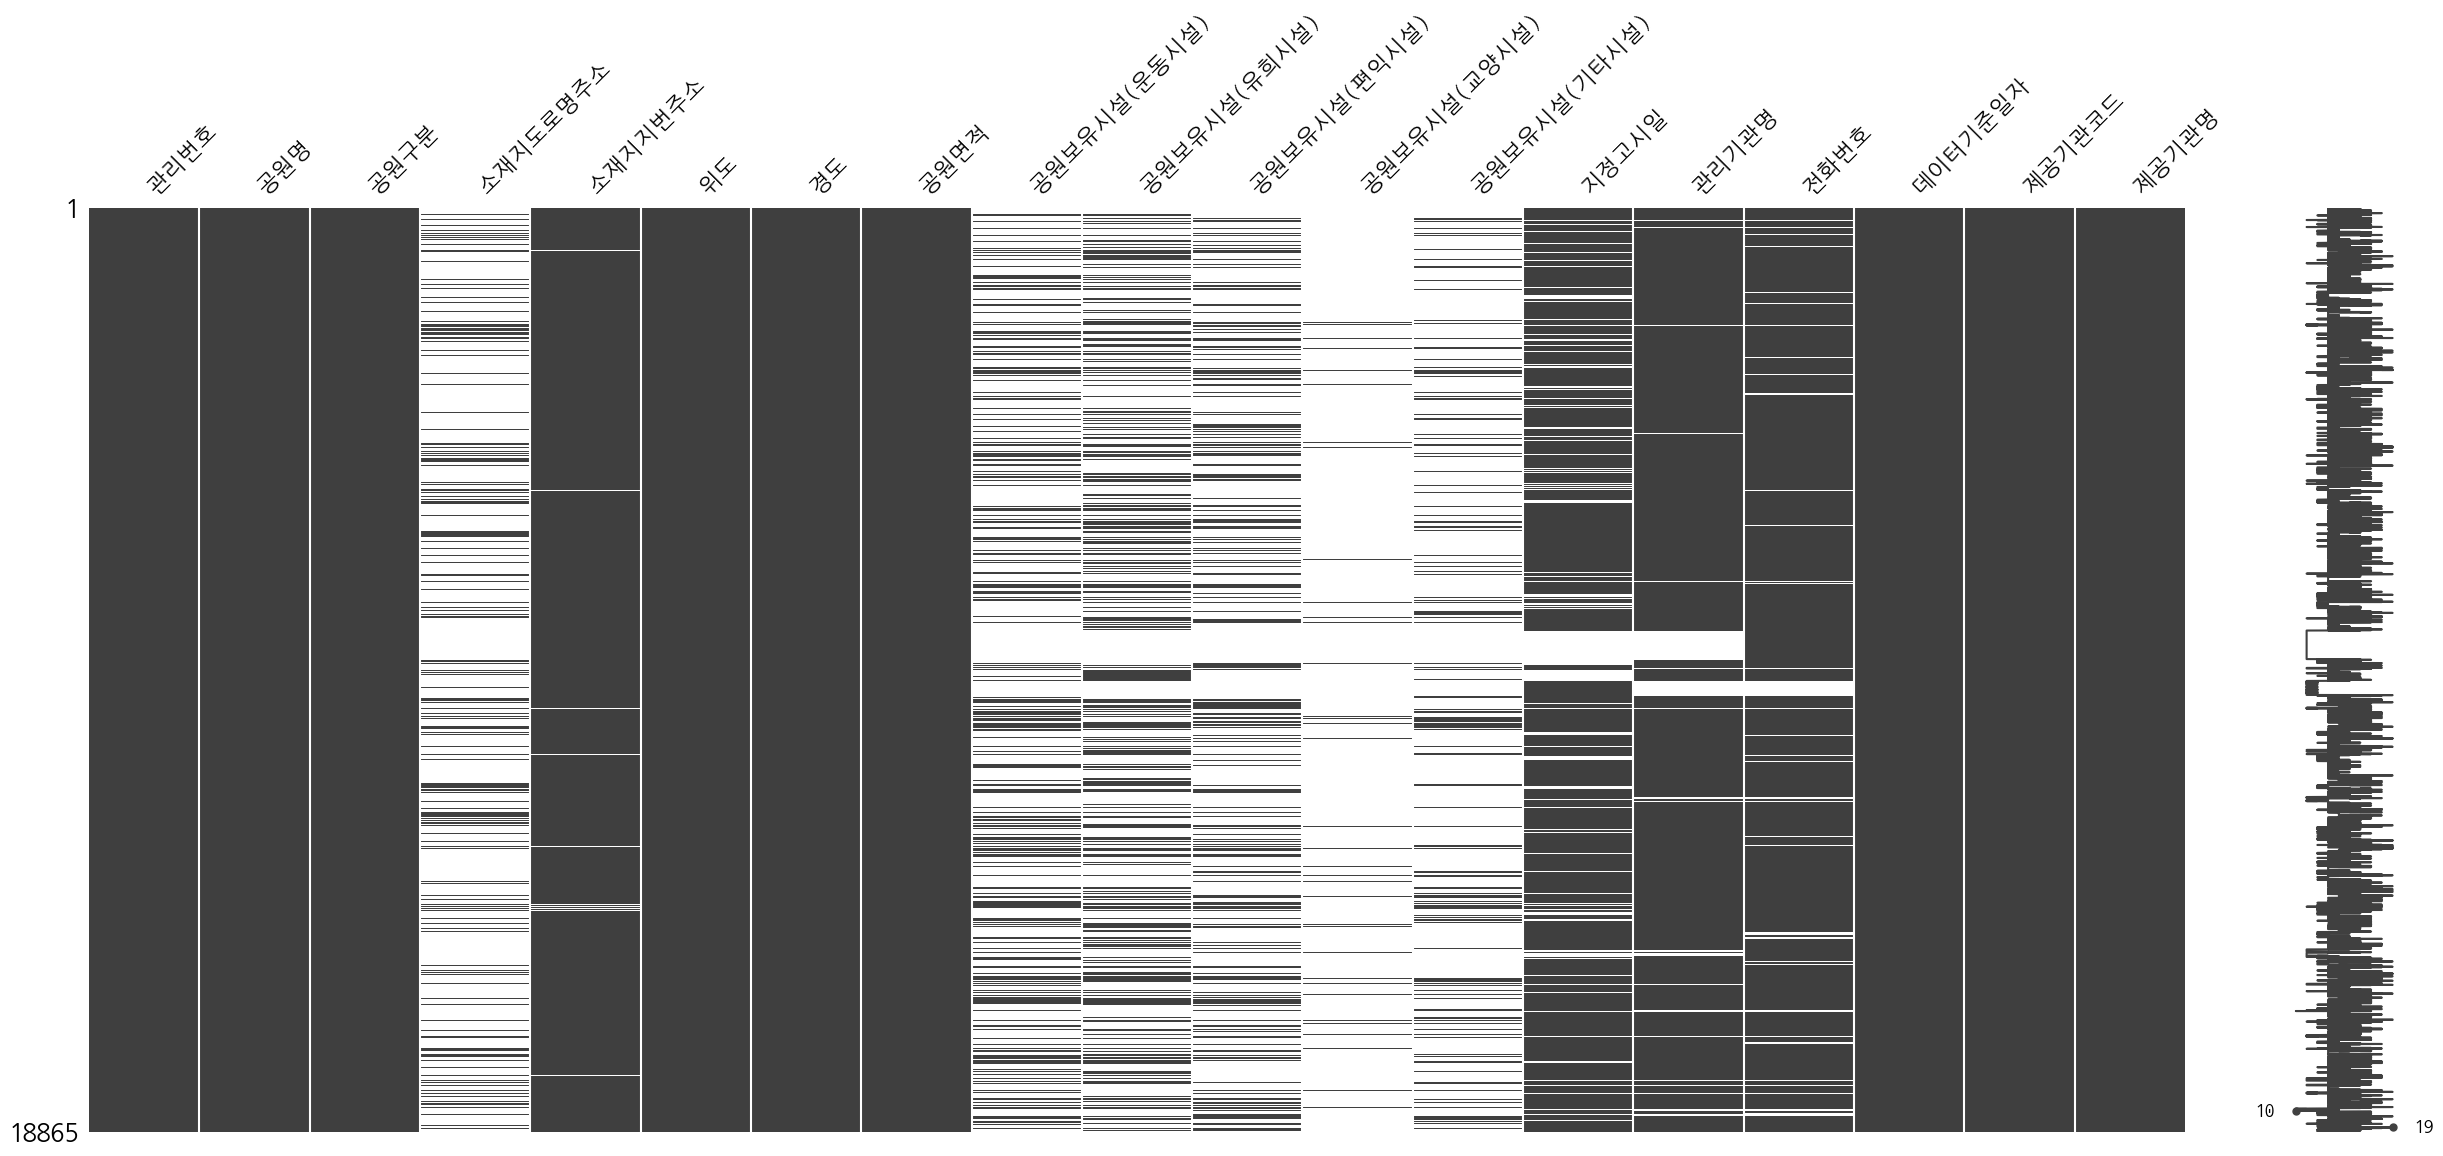

In [5]:
msno.matrix(park_202405, figsize=(30, 12))
plt.show()

In [6]:
park_202405.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [7]:
# drop() 메소드로 불필요한 열을 제거한다.
park_202405.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', 
        '공원보유시설(교양시설)', '공원보유시설(기타시설)', '관리기관명', '지정고시일'], inplace=True)
park_202405

관리번호         공원명  공원구분            소재지도로명주소  \
0      41830-00017    광탄2호 소공원   소공원                 NaN   
1      41830-00031    광탄3호 소공원   소공원                 NaN   
2      41830-00018      공흥 소공원   소공원                 NaN   
3      41830-00019   한강아트로드 공원   소공원                 NaN   
4      41830-00020      강하 소공원   소공원  경기도 양평군 강하면 운심길 58   
...            ...         ...   ...                 ...   
18860  28110-00116  영종하늘도시 33호  근린공원                 NaN   
18861  28110-00117  영종하늘도시 34호  근린공원                 NaN   
18862  28110-00118  영종하늘도시 35호  근린공원                 NaN   
18863  28110-00119  영종하늘도시 36호  근린공원                 NaN   
18864  28110-00120  영종하늘도시 37호  근린공원                 NaN   

                     소재지지번주소         위도          경도     공원면적          전화번호  \
0        경기도 양평군 용문면 광탄리 711  37.509628  127.628406    856.0  031-770-2358   
1        경기도 양평군 용문면 광탄리 762  37.508443  127.627414    847.0  031-770-2358   
2      경기도 양평군 양평읍 공흥리 885-1  37.493844  127.509326   1276.0  031-770-2358   
3      경기도 양평군 강하면 운심리 43-25  37.496021  127.408216   3300.0  031-770-2358   
4       경기도 양평군 강하면 운심리 28-1  37.496164  127.412326    394.0  031-770-2358   
...                      ...        ...         ...      ...           ...   
18860    인천광역시 중구 중산동 1959-2  37.492194  126.575593   8652.0  032-760-7777   
18861   인천광역시 중구 운남동 1745-10  37.482082  126.540403  43514.0  032-760-7777   
18862    인천광역시 중구 운남동 1681-9  37.480161  126.509114  55128.0  032-760-7777   
18863   인천광역시 중구 중산동 1926-19  37.497137  126.575911  10172.0  032-760-7777   
18864   인천광역시 중구 운남동 1722-84  37.482703  126.516949  28384.0  032-760-7777   

          데이터기준일자   제공기관코드     제공기관명  
0      2023-05-26  4170000   경기도 양평군  
1      2023-05-26  4170000   경기도 양평군  
2      2023-05-26  4170000   경기도 양평군  
3      2023-05-26  4170000   경기도 양평군  
4      2023-05-26  4170000   경기도 양평군  
...           ...      ...       ...  
18860  2023-05-16  3490000  인천광역시 중구  
18861  2023-05-16  3490000  인천광역시 중구  
18862  2023-05-16  3490000  인천광역시 중구  
18863  2023-05-16  3490000  인천광역시 중구  
18864  2023-05-16  3490000  인천광역시 중구  

[18865 rows x 12 columns]

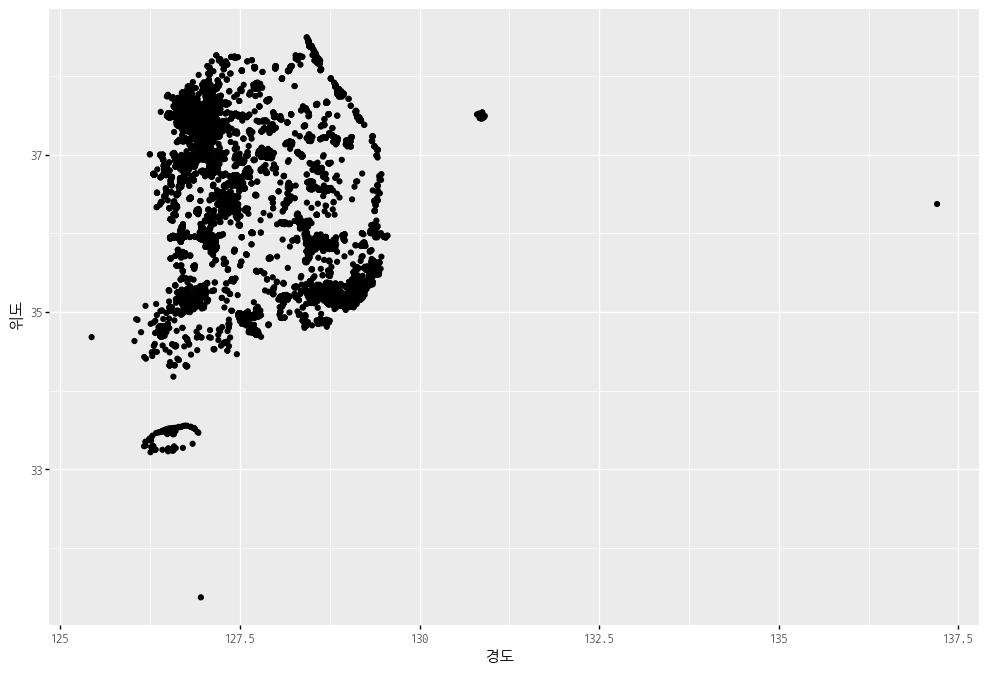

<ggplot: (-9223371882658083619)>

In [8]:
(
    ggplot(park_202405, aes(x='경도', y='위도'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(12, 8))
)

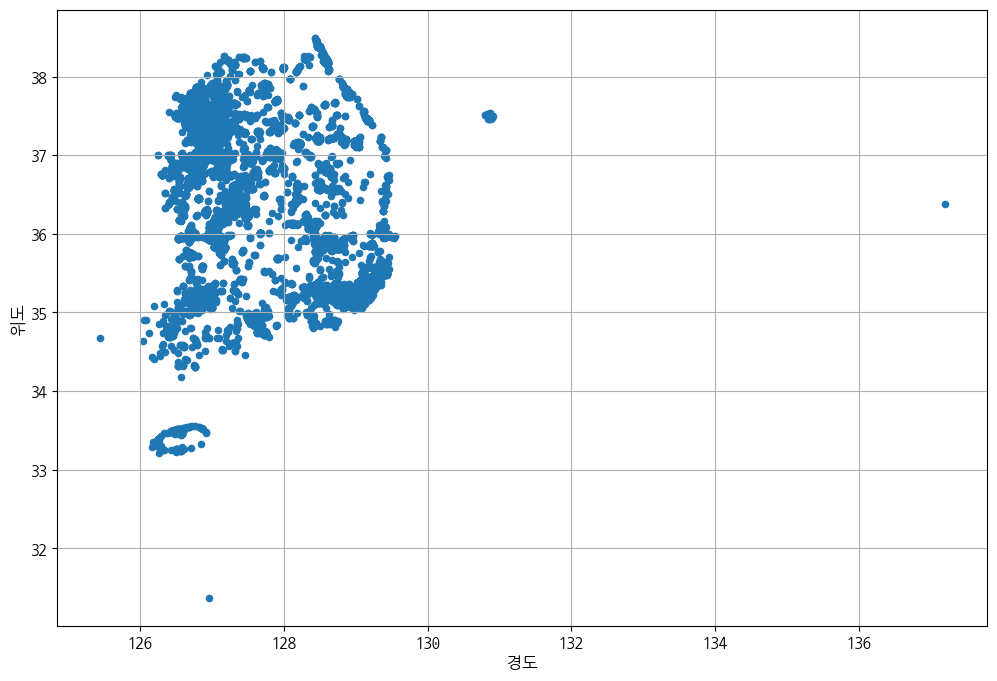

In [9]:
park_202405.plot.scatter(x='경도', y='위도', figsize=(12, 8), grid=True)
plt.show()

주소 전처리 => 도로명 주소가 NaN이면 지번 주소로 채운다.

In [10]:
# 도로명 주소가 NaN인 데이터의 개수 => 지번 주소만 입력된 데이터의 개수
# 도로명 주소만 입력되고 지번 주소가 입력되지 않은 데이터는 도로명 주소 제도가 실행되고 난 후 조성된 공원이다.
park_202405.소재지도로명주소.isnull().sum()

15081

In [11]:
# 도로명 주소는 입력되지 않고 지번 주소만 입력된 데이터
# 불린 인덱싱 작업시 and 조건이나 or 조건이 사용되면 and 연산, or 연산에 참여하는 데이터에 관계 연산자(&, |)가
# 사용되면 연산식 전체를 ()로 묶어준다.
# park_202405[(park_202405.소재지도로명주소.isnull() == True) & (park_202405.소재지지번주소.notnull() == True)]
# and 연산, or 연산에 참여하는 데이터 자체가 논리값이면 ()로 묶지않아도 상관없다.
park_202405[park_202405.소재지도로명주소.isnull() & park_202405.소재지지번주소.notnull()]

관리번호         공원명  공원구분 소재지도로명주소                소재지지번주소  \
0      41830-00017    광탄2호 소공원   소공원      NaN    경기도 양평군 용문면 광탄리 711   
1      41830-00031    광탄3호 소공원   소공원      NaN    경기도 양평군 용문면 광탄리 762   
2      41830-00018      공흥 소공원   소공원      NaN  경기도 양평군 양평읍 공흥리 885-1   
3      41830-00019   한강아트로드 공원   소공원      NaN  경기도 양평군 강하면 운심리 43-25   
5      41830-00021   오빈12호 소공원   소공원      NaN  경기도 양평군 양평읍 오빈리 96-40   
...            ...         ...   ...      ...                    ...   
18860  28110-00116  영종하늘도시 33호  근린공원      NaN    인천광역시 중구 중산동 1959-2   
18861  28110-00117  영종하늘도시 34호  근린공원      NaN   인천광역시 중구 운남동 1745-10   
18862  28110-00118  영종하늘도시 35호  근린공원      NaN    인천광역시 중구 운남동 1681-9   
18863  28110-00119  영종하늘도시 36호  근린공원      NaN   인천광역시 중구 중산동 1926-19   
18864  28110-00120  영종하늘도시 37호  근린공원      NaN   인천광역시 중구 운남동 1722-84   

              위도          경도     공원면적          전화번호     데이터기준일자   제공기관코드  \
0      37.509628  127.628406    856.0  031-770-2358  2023-05-26  4170000   
1      37.508443  127.627414    847.0  031-770-2358  2023-05-26  4170000   
2      37.493844  127.509326   1276.0  031-770-2358  2023-05-26  4170000   
3      37.496021  127.408216   3300.0  031-770-2358  2023-05-26  4170000   
5      37.505413  127.476939    864.0  031-770-2358  2023-05-26  4170000   
...          ...         ...      ...           ...         ...      ...   
18860  37.492194  126.575593   8652.0  032-760-7777  2023-05-16  3490000   
18861  37.482082  126.540403  43514.0  032-760-7777  2023-05-16  3490000   
18862  37.480161  126.509114  55128.0  032-760-7777  2023-05-16  3490000   
18863  37.497137  126.575911  10172.0  032-760-7777  2023-05-16  3490000   
18864  37.482703  126.516949  28384.0  032-760-7777  2023-05-16  3490000   

          제공기관명  
0       경기도 양평군  
1       경기도 양평군  
2       경기도 양평군  
3       경기도 양평군  
5       경기도 양평군  
...         ...  
18860  인천광역시 중구  
18861  인천광역시 중구  
18862  인천광역시 중구  
18863  인천광역시 중구  
18864  인천광역시 중구  

[15081 rows x 12 columns]

In [12]:
# 지번 주소가 NaN인 데이터의 개수 => 도로명 주소만 입력된 데이터의 개수
park_202405.소재지지번주소.isnull().sum()

224

In [13]:
# 도로명 주소는 입력되고 않고 지번 주소가 입력되지 않은 데이터
park_202405[park_202405.소재지도로명주소.notnull() & park_202405.소재지지번주소.isnull()]

관리번호       공원명   공원구분                 소재지도로명주소 소재지지번주소  \
498    44150-00007    백미고을공원  어린이공원  충청남도 공주시 백미고을길 9-4(금성동)     NaN   
658    29200-00124        솔빛  어린이공원   광주광역시 광산구 왕버들로132번길 22     NaN   
848    44150-00017      봉곡공원   근린공원     충청남도 공주시 반포면 원당3길 24     NaN   
856    44150-00009      앵산공원   근린공원   충청남도 공주시 중앙공원1길 11(중동)     NaN   
857    44150-00008     미나리공원  어린이공원    충청남도 공주시 미나리3길 9(금성동)     NaN   
...            ...       ...    ...                      ...     ...   
18667  26200-00005   상리어린이공원  어린이공원          부산광역시 영도구 상리로 7     NaN   
18668  26200-00006  일산봉어린이공원  어린이공원          부산광역시 영도구 상리로 1     NaN   
18669  26200-00007   광명어린이공원  어린이공원         부산광역시 영도구 상리로 38     NaN   
18705  11350-00057      달  빛  어린이공원        서울특별시 노원구 노원로 532     NaN   
18706  11350-00022       달맞이   근린공원  서울특별시 노원구 덕릉로 483 (중계동)     NaN   

              위도          경도     공원면적          전화번호     데이터기준일자   제공기관코드  \
498    36.465189  127.122296   1540.0  041-840-8557  2022-11-21  4500000   
658    35.201133  126.822218   1500.0  062-960-8712  2023-03-16  3630000   
848    36.407278  127.242558  30870.0  041-840-8557  2022-11-21  4500000   
856    36.452538  127.125423   9431.0  041-840-8557  2022-11-21  4500000   
857    36.462841  127.122303   2182.0  041-840-8557  2022-11-21  4500000   
...          ...         ...      ...           ...         ...      ...   
18667  35.086575  129.067420   3852.0  051-419-4531  2023-12-07  3280000   
18668  35.085692  129.070034   1878.0  051-419-4531  2023-12-07  3280000   
18669  35.083947  129.067073   3165.0  051-419-4531  2023-12-07  3280000   
18705  37.664617  127.059817   1500.0           NaN  2023-08-09  3100000   
18706  37.645609  127.062715   8838.9           NaN  2023-08-09  3100000   

           제공기관명  
498     충청남도 공주시  
658    광주광역시 광산구  
848     충청남도 공주시  
856     충청남도 공주시  
857     충청남도 공주시  
...          ...  
18667  부산광역시 영도구  
18668  부산광역시 영도구  
18669  부산광역시 영도구  
18705  서울특별시 노원구  
18706  서울특별시 노원구  

[224 rows x 12 columns]

In [14]:
# 도로명 주소와 지번 주소가 모두 입력된 데이터
park_202405[park_202405.소재지도로명주소.notnull() & park_202405.소재지지번주소.notnull()]

관리번호        공원명   공원구분                   소재지도로명주소  \
4      41830-00020     강하 소공원    소공원         경기도 양평군 강하면 운심길 58   
7      41830-00023  오빈14호 소공원    소공원    경기도 양평군 양평읍 오빈1리길12번길 4   
8      41830-00024  오빈15호 소공원    소공원        경기도 양평군 양평읍 오빈1리길 9   
17     27290-00127    송일어린이공원  어린이공원         대구광역시 달서구 학산로2길 38   
18     27290-00128       송지공원  어린이공원        대구광역시 달서구 앞산순환로 255   
...            ...        ...    ...                        ...   
18817  41190-00181         행복  어린이공원  경기도 부천시 원미구 상일로149번길 18-9   
18828  42730-00024  안흥어린이공원3호  어린이공원       강원도 횡성군 안흥면 안흥동4길 28   
18835  41190-00147         은행  어린이공원     경기도 부천시 원미구 원미로149번길 4   
18849  48129-00031      석동2공원   근린공원        경상남도 창원시 진해구 석동로 66   
18851  48129-00033      어린이공원  어린이공원   경상남도 창원시 진해구 냉천로129번길 17   

                     소재지지번주소         위도          경도     공원면적          전화번호  \
4       경기도 양평군 강하면 운심리 28-1  37.496164  127.412326    394.0  031-770-2358   
7      경기도 양평군 양평읍 오빈리 88-46  37.507148  127.479103    404.0  031-770-2358   
8      경기도 양평군 양평읍 오빈리 81-32  37.506986  127.479677    293.0  031-770-2358   
17       대구광역시 달서구 월성동 500-1  35.824133  128.532821   1786.0  053-667-3636   
18        대구광역시 달서구 송현동 1977  35.826169  128.555895   1649.4  053-667-3636   
...                      ...        ...         ...      ...           ...   
18817     경기도 부천시 원미구 상동 426  37.491734  126.759839   1883.9  032-625-4864   
18828  강원도 횡성군 안흥면 안흥리 36-57  37.408713  128.158347   1510.0  033-340-2472   
18835     경기도 부천시 원미구 원미동 57  37.496183  126.790868   4106.4  032-625-4856   
18849    경상남도 창원시 진해구 석동 657  35.155208  128.706573  10046.6  055-548-4501   
18851    경상남도 창원시 진해구 석동 661  35.155642  128.709718   1649.6  055-548-4501   

          데이터기준일자   제공기관코드      제공기관명  
4      2023-05-26  4170000    경기도 양평군  
7      2023-05-26  4170000    경기도 양평군  
8      2023-05-26  4170000    경기도 양평군  
17     2023-10-13  3470000  대구광역시 달서구  
18     2023-10-13  3470000  대구광역시 달서구  
...           ...      ...        ...  
18817  2024-01-23  3860000    경기도 부천시  
18828  2021-12-22  4260000    강원도 횡성군  
18835  2024-01-23  3860000    경기도 부천시  
18849  2022-12-01  5670000   경상남도 창원시  
18851  2022-12-01  5670000   경상남도 창원시  

[3560 rows x 12 columns]

In [15]:
# 도로명 주소와 지번 주소가 모두 입력되지 않은 데이터
park_202405[park_202405.소재지도로명주소.isnull() & park_202405.소재지지번주소.isnull()]

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명]
Index: []

In [16]:
# 도로명 주소에 입력된 '-'를(경상북도 칠곡군) 누락값으로 변경한다.
park_202405[park_202405.소재지도로명주소 == '-']

관리번호              공원명   공원구분 소재지도로명주소                   소재지지번주소  \
4063   47850-00045             송림공원   수변공원        -      경상북도 칠곡군 동명면 구덕리 415   
13019  47850-00033           삼청제1공원  어린이공원        -    경상북도 칠곡군 왜관읍 삼청리 477-7   
13020  47850-00034        왜관제4어린이공원  어린이공원        -     경상북도 칠곡군 왜관읍 왜관리 1449   
13021  47850-00035            왜관소공원    소공원        -     경상북도 칠곡군 왜관읍 왜관리 1542   
13022  47850-00036           아곡1소공원    소공원        -      경상북도 칠곡군 왜관읍 아곡리 829   
13023  47850-00037           아곡2소공원    소공원        -      경상북도 칠곡군 왜관읍 아곡리 816   
13024  47850-00038        연화공원(소공원)    소공원        -     경상북도 칠곡군 지천면 연화리 1035   
13025  47850-00039             한실공원   근린공원        -     경상북도 칠곡군 왜관읍 삼청리 1100   
13026  47850-00040       왜관3공단-1호공원   체육공원        -     경상북도 칠곡군 왜관읍 낙산리 1027   
13027  47850-00041       왜관3공단-2호공원    소공원        -     경상북도 칠곡군 왜관읍 낙산리 1115   
13028  47850-00042       왜관3공단-3호공원    소공원        -     경상북도 칠곡군 왜관읍 낙산리 1066   
13029  47850-00043       왜관3공단-4호공원   근린공원        -   경상북도 칠곡군 왜관읍 낙산리 1162-2   
13030  47850-00044         중리3공단소공원    소공원        -     경상북도 칠곡군 석적읍 중리 443-9   
13043  47850-00021   중리제5공원(테니스장공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 247-3   
13044  47850-00022    중리제6공원(배수지공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 263-2   
13045  47850-00023           남율제1공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 143   
13046  47850-00024           남율제2공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 산38   
13047  47850-00025           남율제3공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 235   
13048  47850-00026           남율제4공원  어린이공원        -  경상북도 칠곡군 석적읍 남율리 산 45-13   
13049  47850-00027           남율제5공원  어린이공원        -  경상북도 칠곡군 석적읍 남율리 산 44-20   
13050  47850-00028   중리제7공원(장승백이공원)  어린이공원        -    경상북도 칠곡군 석적읍 중리 161-16   
13051  47850-00029    중리제8공원(신맞이공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 172-3   
13052  47850-00030     중리제9공원(큰골공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 170-6   
13053  47850-00031             낙산공원   근린공원        -    경상북도 칠곡군 왜관읍 낙산리 690-1   
13069  47850-00001             동락공원   근린공원        -     경상북도 칠곡군 석적읍 중리 495-5   
13070  47850-00002    인평제2공원(한마음공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 705-3   
13071  47850-00003     인평제3공원(허브공원)  어린이공원        -     경상북도 칠곡군 북삼읍 숭오리 15-1   
13073  47850-00005   인평제5공원(해오름1공원)  어린이공원        -     경상북도 칠곡군 북삼읍 인평리 1087   
13076  47850-00008     인평제7공원(나눔공원)  어린이공원        -   경상북도 칠곡군 북삼읍 인평리 1073-1   
13077  47850-00009     인평제8공원(하늘공원)  어린이공원        -   경상북도 칠곡군 북삼읍 인평리 1074-1   
13078  47850-00010         삼청리어린이공원  어린이공원        -   경상북도 칠곡군 왜관읍 삼청리 410-23   
13079  47850-00011    인평제9공원(늘푸른공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 271-2   
13080  47850-00012   인평제10공원(다모아공원)  어린이공원        -    경상북도 칠곡군 북삼읍 숭오리 26-10   
13081  47850-00013    인평제11공원(두리공원)  어린이공원        -     경상북도 칠곡군 북삼읍 숭오리 21-8   
13082  47850-00014   인평제12공원(은하수공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 671-1   
13084  47850-00016  인평제14공원(해오름2공원)  어린이공원        -     경상북도 칠곡군 북삼읍 인평리 1033   
13085  47850-00017     중리제1공원(섬계공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 187   
13086  47850-00018     중리제2공원(광암공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 211   
13087  47850-00019   중리제3공원(화산서당공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 230   
13088  47850-00020  중리제4공원(게이트볼장공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 238-4   

              위도          경도      공원면적          전화번호     데이터기준일자   제공기관코드  \
4063   35.983928  128.567842  494957.0  054-979-5390  2020-07-16  5220000   
13019  35.983819  128.425973     900.0  054-979-6832  2020-07-16  5220000   
13020  35.978114  128.400493    2330.0  054-979-6832  2020-07-16  5220000   
13021  35.975735  128.399525    2330.0  054-979-6832  2020-07-16  5220000   
13022  36.010701  128.430388    1573.0  054-979-6832  2020-07-16  5220000   
13023  36.006775  128.432897    1491.0  054-979-6832  2020-07-16  5220000   
13024  35.953046  128.457239     666.0  054-979-6832  2020-07-16  5220000   
13025  35.970680  128.429810   23641.0  054-979-6832  2020-07-16  5220000   

In [17]:
park_202405.loc[park_202405.소재지도로명주소 == '-', '소재지도로명주소'] = np.NaN

In [18]:
park_202405[park_202405.소재지도로명주소 == '-']

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명]
Index: []

In [19]:
park_202405[park_202405.제공기관명 == '경상북도 칠곡군']

관리번호              공원명   공원구분                  소재지도로명주소  \
4063   47850-00045             송림공원   수변공원                       NaN   
13018  47850-00032             왜관공원  어린이공원      경상북도 칠곡군 왜관읍 중앙로 266   
13019  47850-00033           삼청제1공원  어린이공원                       NaN   
13020  47850-00034        왜관제4어린이공원  어린이공원                       NaN   
13021  47850-00035            왜관소공원    소공원                       NaN   
13022  47850-00036           아곡1소공원    소공원                       NaN   
13023  47850-00037           아곡2소공원    소공원                       NaN   
13024  47850-00038        연화공원(소공원)    소공원                       NaN   
13025  47850-00039             한실공원   근린공원                       NaN   
13026  47850-00040       왜관3공단-1호공원   체육공원                       NaN   
13027  47850-00041       왜관3공단-2호공원    소공원                       NaN   
13028  47850-00042       왜관3공단-3호공원    소공원                       NaN   
13029  47850-00043       왜관3공단-4호공원   근린공원                       NaN   
13030  47850-00044         중리3공단소공원    소공원                       NaN   
13043  47850-00021   중리제5공원(테니스장공원)  어린이공원                       NaN   
13044  47850-00022    중리제6공원(배수지공원)  어린이공원                       NaN   
13045  47850-00023           남율제1공원  어린이공원                       NaN   
13046  47850-00024           남율제2공원  어린이공원                       NaN   
13047  47850-00025           남율제3공원  어린이공원                       NaN   
13048  47850-00026           남율제4공원  어린이공원                       NaN   
13049  47850-00027           남율제5공원  어린이공원                       NaN   
13050  47850-00028   중리제7공원(장승백이공원)  어린이공원                       NaN   
13051  47850-00029    중리제8공원(신맞이공원)  어린이공원                       NaN   
13052  47850-00030     중리제9공원(큰골공원)  어린이공원                       NaN   
13053  47850-00031             낙산공원   근린공원                       NaN   
13069  47850-00001             동락공원   근린공원                       NaN   
13070  47850-00002    인평제2공원(한마음공원)  어린이공원                       NaN   
13071  47850-00003     인평제3공원(허브공원)  어린이공원                       NaN   
13072  47850-00004   인평제4공원(그루터기공원)  어린이공원                       NaN   
13073  47850-00005   인평제5공원(해오름1공원)  어린이공원                       NaN   
13074  47850-00006     인평제2공원(체육공원)   근린공원       경상북도 칠곡군 북삼읍 북삼로 65   
13075  47850-00007             금산공원   근린공원  경상북도 칠곡군 왜관읍 공단로4길 18-26   
13076  47850-00008     인평제7공원(나눔공원)  어린이공원                       NaN   
13077  47850-00009     인평제8공원(하늘공원)  어린이공원                       NaN   
13078  47850-00010         삼청리어린이공원  어린이공원                       NaN   
13079  47850-00011    인평제9공원(늘푸른공원)  어린이공원                       NaN   
13080  47850-00012   인평제10공원(다모아공원)  어린이공원                       NaN   
13081  47850-00013    인평제11공원(두리공원)  어린이공원                       NaN   
13082  47850-00014   인평제12공원(은하수공원)  어린이공원                       NaN   
13083  47850-00015    인평제13공원(초록공원)  어린이공원                       NaN   
13084  47850-00016  인평제14공원(해오름2공원)  어린이공원                       NaN   
13085  47850-00017     중리제1공원(섬계공원)  어린이공원                       NaN   
13086  47850-00018     중리제2공원(광암공원)  어린이공원                       NaN   
13087  47850-00019   중리제3공원(화산서당공원)  어린이공원                       NaN   
13088  47850-00020  중리제4공원(게이트볼장공원)  어린이공원                       NaN   

                        소재지지번주소         위도          경도      공원면적  \
4063       경상북도 칠곡군 동명면 구덕리 415  35.983928  128.567842  494957.0   
13018      경상북도 칠곡군 왜관읍 석전리 792  35.998615  128.398044    7695.0   
13019    경상북도 칠곡군 왜관읍 삼청리 477-7  35.983819  128.425973     900.0   
13020     경상북도 칠곡군 왜관읍 왜관리 1449  35.978114  128.400493    2330.0   
13021     경상북도 칠곡군 왜관읍 왜관리 1542  35.975735  128.399525    2330.0   
13022      경상북도 칠곡군 왜관읍 아곡리 829  36.010701  128.430388    1573.0   
13023      경상북도 칠곡군 왜관읍 아곡리 816  36.006775  128.432897    1491.0   
13024     경상북도 칠곡군 지천면 연화리 1035  35.953046  128.457239     666.0   
13025     경상북도 칠곡군 왜관읍 삼청리 1100  35.970680  128.429810   23641.0   
13026     경상북도 칠곡군 왜관

In [20]:
# 도로명 주소가 NaN인 데이터를 지번 주소로 채운다.
park_202405.소재지도로명주소.fillna(park_202405.소재지지번주소, inplace=True)
park_202405.소재지도로명주소.isnull().sum()

0

In [21]:
park_202405[park_202405.제공기관코드 == '5220000']

관리번호              공원명   공원구분                  소재지도로명주소  \
4063   47850-00045             송림공원   수변공원      경상북도 칠곡군 동명면 구덕리 415   
13018  47850-00032             왜관공원  어린이공원      경상북도 칠곡군 왜관읍 중앙로 266   
13019  47850-00033           삼청제1공원  어린이공원    경상북도 칠곡군 왜관읍 삼청리 477-7   
13020  47850-00034        왜관제4어린이공원  어린이공원     경상북도 칠곡군 왜관읍 왜관리 1449   
13021  47850-00035            왜관소공원    소공원     경상북도 칠곡군 왜관읍 왜관리 1542   
13022  47850-00036           아곡1소공원    소공원      경상북도 칠곡군 왜관읍 아곡리 829   
13023  47850-00037           아곡2소공원    소공원      경상북도 칠곡군 왜관읍 아곡리 816   
13024  47850-00038        연화공원(소공원)    소공원     경상북도 칠곡군 지천면 연화리 1035   
13025  47850-00039             한실공원   근린공원     경상북도 칠곡군 왜관읍 삼청리 1100   
13026  47850-00040       왜관3공단-1호공원   체육공원     경상북도 칠곡군 왜관읍 낙산리 1027   
13027  47850-00041       왜관3공단-2호공원    소공원     경상북도 칠곡군 왜관읍 낙산리 1115   
13028  47850-00042       왜관3공단-3호공원    소공원     경상북도 칠곡군 왜관읍 낙산리 1066   
13029  47850-00043       왜관3공단-4호공원   근린공원   경상북도 칠곡군 왜관읍 낙산리 1162-2   
13030  47850-00044         중리3공단소공원    소공원     경상북도 칠곡군 석적읍 중리 443-9   
13043  47850-00021   중리제5공원(테니스장공원)  어린이공원     경상북도 칠곡군 석적읍 중리 247-3   
13044  47850-00022    중리제6공원(배수지공원)  어린이공원     경상북도 칠곡군 석적읍 중리 263-2   
13045  47850-00023           남율제1공원  어린이공원      경상북도 칠곡군 석적읍 남율리 143   
13046  47850-00024           남율제2공원  어린이공원      경상북도 칠곡군 석적읍 남율리 산38   
13047  47850-00025           남율제3공원  어린이공원      경상북도 칠곡군 석적읍 남율리 235   
13048  47850-00026           남율제4공원  어린이공원  경상북도 칠곡군 석적읍 남율리 산 45-13   
13049  47850-00027           남율제5공원  어린이공원  경상북도 칠곡군 석적읍 남율리 산 44-20   
13050  47850-00028   중리제7공원(장승백이공원)  어린이공원    경상북도 칠곡군 석적읍 중리 161-16   
13051  47850-00029    중리제8공원(신맞이공원)  어린이공원     경상북도 칠곡군 석적읍 중리 172-3   
13052  47850-00030     중리제9공원(큰골공원)  어린이공원     경상북도 칠곡군 석적읍 중리 170-6   
13053  47850-00031             낙산공원   근린공원    경상북도 칠곡군 왜관읍 낙산리 690-1   
13069  47850-00001             동락공원   근린공원     경상북도 칠곡군 석적읍 중리 495-5   
13070  47850-00002    인평제2공원(한마음공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 705-3   
13071  47850-00003     인평제3공원(허브공원)  어린이공원     경상북도 칠곡군 북삼읍 숭오리 15-1   
13072  47850-00004   인평제4공원(그루터기공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 676-1   
13073  47850-00005   인평제5공원(해오름1공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1087   
13074  47850-00006     인평제2공원(체육공원)   근린공원       경상북도 칠곡군 북삼읍 북삼로 65   
13075  47850-00007             금산공원   근린공원  경상북도 칠곡군 왜관읍 공단로4길 18-26   
13076  47850-00008     인평제7공원(나눔공원)  어린이공원   경상북도 칠곡군 북삼읍 인평리 1073-1   
13077  47850-00009     인평제8공원(하늘공원)  어린이공원   경상북도 칠곡군 북삼읍 인평리 1074-1   
13078  47850-00010         삼청리어린이공원  어린이공원   경상북도 칠곡군 왜관읍 삼청리 410-23   
13079  47850-00011    인평제9공원(늘푸른공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 271-2   
13080  47850-00012   인평제10공원(다모아공원)  어린이공원    경상북도 칠곡군 북삼읍 숭오리 26-10   
13081  47850-00013    인평제11공원(두리공원)  어린이공원     경상북도 칠곡군 북삼읍 숭오리 21-8   
13082  47850-00014   인평제12공원(은하수공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 671-1   
13083  47850-00015    인평제13공원(초록공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1025   
13084  47850-00016  인평제14공원(해오름2공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1033   
13085  47850-00017     중리제1공원(섬계공원)  어린이공원       경상북도 칠곡군 석적읍 중리 187   
13086  47850-00018     중리제2공원(광암공원)  어린이공원       경상북도 칠곡군 석적읍 중리 211   
13087  47850-00019   중리제3공원(화산서당공원)  어린이공원       경상북도 칠곡군 석적읍 중리 230   
13088  47850-00020  중리제4공원(게이트볼장공원)  어린이공원     경상북도 칠곡군 석적읍 중리 238-4   

                        소재지지번주소         위도          경도      공원면적  \
4063       경상북도 칠곡군 동명면 구덕리 415  35.983928  128.567842  494957.0   
13018      경상북도 칠곡군 왜관읍 석전리 792  35.998615  128.398044    7695.0   
13019    경상북도 칠곡군 왜관읍 삼청리 477-7  35.983819  128.425973     900.0   
13020     경상북도 칠곡군 왜관읍 왜관리 1449  35.978114  128.400493    2330.0   
13021     경상북도 칠곡군 왜관읍 왜관리 1542  35.975735  128.399525    2330.0   
13022      경상북도 칠곡군 왜관읍 아곡리 829  36.010701  128.430388    1573.0   
13023      경상북도 칠곡군 왜관읍 아곡리 816  36.006775  128.432897    1491.0   
13024     경상북도 칠곡군 지천면 연화리 1035  35.953046  128.457239     666.0   
13025     경상북도 칠곡군 왜관읍 삼청리 1100  35.970680  128.429810   23641.0   
13026     경상북도 칠곡군 왜관

도로명 주소에서 공백을 경계로 분리해서 4번째 레벨까지 추가한다.

In [22]:
# split() 메소드 실행시 expand=True 옵션을 지정하면 구분자를 경계로 분리된 결과가 데이터프레임으로 만들어진다.
park_202405.소재지도로명주소.str.split(' ', expand=True)

0    1    2        3      4     5     6     7     8
0        경기도  양평군  용문면      광탄리    711  None  None  None  None
1        경기도  양평군  용문면      광탄리    762  None  None  None  None
2        경기도  양평군  양평읍      공흥리  885-1  None  None  None  None
3        경기도  양평군  강하면      운심리  43-25  None  None  None  None
4        경기도  양평군  강하면      운심길     58  None  None  None  None
...      ...  ...  ...      ...    ...   ...   ...   ...   ...
18860  인천광역시   중구  중산동   1959-2   None  None  None  None  None
18861  인천광역시   중구  운남동  1745-10   None  None  None  None  None
18862  인천광역시   중구  운남동   1681-9   None  None  None  None  None
18863  인천광역시   중구  중산동  1926-19   None  None  None  None  None
18864  인천광역시   중구  운남동  1722-84   None  None  None  None  None

[18865 rows x 9 columns]

In [23]:
park_202405['주소1'] = park_202405.소재지도로명주소.str.split(' ', expand=True)[0]
park_202405['주소2'] = park_202405.소재지도로명주소.str.split(' ', expand=True)[1]
park_202405['주소3'] = park_202405.소재지도로명주소.str.split(' ', expand=True)[2]
park_202405['주소4'] = park_202405.소재지도로명주소.str.split(' ', expand=True)[3]
park_202405

관리번호         공원명  공원구분               소재지도로명주소  \
0      41830-00017    광탄2호 소공원   소공원    경기도 양평군 용문면 광탄리 711   
1      41830-00031    광탄3호 소공원   소공원    경기도 양평군 용문면 광탄리 762   
2      41830-00018      공흥 소공원   소공원  경기도 양평군 양평읍 공흥리 885-1   
3      41830-00019   한강아트로드 공원   소공원  경기도 양평군 강하면 운심리 43-25   
4      41830-00020      강하 소공원   소공원     경기도 양평군 강하면 운심길 58   
...            ...         ...   ...                    ...   
18860  28110-00116  영종하늘도시 33호  근린공원    인천광역시 중구 중산동 1959-2   
18861  28110-00117  영종하늘도시 34호  근린공원   인천광역시 중구 운남동 1745-10   
18862  28110-00118  영종하늘도시 35호  근린공원    인천광역시 중구 운남동 1681-9   
18863  28110-00119  영종하늘도시 36호  근린공원   인천광역시 중구 중산동 1926-19   
18864  28110-00120  영종하늘도시 37호  근린공원   인천광역시 중구 운남동 1722-84   

                     소재지지번주소         위도          경도     공원면적          전화번호  \
0        경기도 양평군 용문면 광탄리 711  37.509628  127.628406    856.0  031-770-2358   
1        경기도 양평군 용문면 광탄리 762  37.508443  127.627414    847.0  031-770-2358   
2      경기도 양평군 양평읍 공흥리 885-1  37.493844  127.509326   1276.0  031-770-2358   
3      경기도 양평군 강하면 운심리 43-25  37.496021  127.408216   3300.0  031-770-2358   
4       경기도 양평군 강하면 운심리 28-1  37.496164  127.412326    394.0  031-770-2358   
...                      ...        ...         ...      ...           ...   
18860    인천광역시 중구 중산동 1959-2  37.492194  126.575593   8652.0  032-760-7777   
18861   인천광역시 중구 운남동 1745-10  37.482082  126.540403  43514.0  032-760-7777   
18862    인천광역시 중구 운남동 1681-9  37.480161  126.509114  55128.0  032-760-7777   
18863   인천광역시 중구 중산동 1926-19  37.497137  126.575911  10172.0  032-760-7777   
18864   인천광역시 중구 운남동 1722-84  37.482703  126.516949  28384.0  032-760-7777   

          데이터기준일자   제공기관코드     제공기관명    주소1  주소2  주소3      주소4  
0      2023-05-26  4170000   경기도 양평군    경기도  양평군  용문면      광탄리  
1      2023-05-26  4170000   경기도 양평군    경기도  양평군  용문면      광탄리  
2      2023-05-26  4170000   경기도 양평군    경기도  양평군  양평읍      공흥리  
3      2023-05-26  4170000   경기도 양평군    경기도  양평군  강하면      운심리  
4      2023-05-26  4170000   경기도 양평군    경기도  양평군  강하면      운심길  
...           ...      ...       ...    ...  ...  ...      ...  
18860  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  중산동   1959-2  
18861  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동  1745-10  
18862  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동   1681-9  
18863  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  중산동  1926-19  
18864  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동  1722-84  

[18865 rows x 16 columns]

위도, 경도 전처리 => 대한민국 영토 범위를 벗어난 위도, 경도와 입력되지 않은 위도, 경도를 찾아 처리한다.

In [24]:
park_202405[['위도', '경도']].describe()

위도            경도
count  18865.000000  18865.000000
mean      36.553453    127.477932
std        1.023627      0.839361
min       31.373335    125.433012
25%       35.810916    126.884340
50%       36.807882    127.112275
75%       37.464427    128.067874
max       38.493170    137.202661

In [25]:
# 위도와 경도가 대한민국 영토 범위를 벗어난 데이터를 추출한다.
park_202405[(park_202405.위도 < 32) | (park_202405.경도 > 132)]
# 제24호 소공원: 31.373335, 126.954253 => 37.37313817, 126.954253
# 근린공원5(만수공원): 36.374204, 137.202661 => 36.374204, 127.33201262

관리번호          공원명  공원구분                  소재지도로명주소  \
6682   41173-00122     제24호 소공원   소공원      경기도 안양시 동안구 호계동 1308   
17227  43113-00080  근린공원5(만수공원)  근린공원  충청북도 청주시 흥덕구 오송읍 만수리 512   

                        소재지지번주소         위도          경도     공원면적  \
6682       경기도 안양시 동안구 호계동 1308  31.373335  126.954253   2159.0   
17227  충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661  33258.0   

                전화번호     데이터기준일자   제공기관코드     제공기관명   주소1  주소2  주소3  주소4  
6682   031-8045-5022  2023-12-27  3830000   경기도 안양시   경기도  안양시  동안구  호계동  
17227   043-201-4433  2020-07-16  5710000  충청북도 청주시  충청북도  청주시  흥덕구  오송읍

In [26]:
park_202405.loc[6682, '위도'] = 37.37313817
park_202405.loc[17227, '경도'] = 127.33201262

In [27]:
park_202405[(park_202405.위도 < 32) | (park_202405.경도 > 132)]

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명, 주소1, 주소2, 주소3, 주소4]
Index: []

In [28]:
# 위도와 경도가 입력되지 않은 데이터를 추출한다.
park_202405[(park_202405.위도.isnull()) | (park_202405.경도.isnull())]

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명, 주소1, 주소2, 주소3, 주소4]
Index: []

In [29]:
# 위도와 경도가 올바른 데이터만 추출한다.
park_202405 = park_202405[(park_202405.위도 >= 32) & (park_202405.경도 <= 132)]
park_202405

관리번호         공원명  공원구분               소재지도로명주소  \
0      41830-00017    광탄2호 소공원   소공원    경기도 양평군 용문면 광탄리 711   
1      41830-00031    광탄3호 소공원   소공원    경기도 양평군 용문면 광탄리 762   
2      41830-00018      공흥 소공원   소공원  경기도 양평군 양평읍 공흥리 885-1   
3      41830-00019   한강아트로드 공원   소공원  경기도 양평군 강하면 운심리 43-25   
4      41830-00020      강하 소공원   소공원     경기도 양평군 강하면 운심길 58   
...            ...         ...   ...                    ...   
18860  28110-00116  영종하늘도시 33호  근린공원    인천광역시 중구 중산동 1959-2   
18861  28110-00117  영종하늘도시 34호  근린공원   인천광역시 중구 운남동 1745-10   
18862  28110-00118  영종하늘도시 35호  근린공원    인천광역시 중구 운남동 1681-9   
18863  28110-00119  영종하늘도시 36호  근린공원   인천광역시 중구 중산동 1926-19   
18864  28110-00120  영종하늘도시 37호  근린공원   인천광역시 중구 운남동 1722-84   

                     소재지지번주소         위도          경도     공원면적          전화번호  \
0        경기도 양평군 용문면 광탄리 711  37.509628  127.628406    856.0  031-770-2358   
1        경기도 양평군 용문면 광탄리 762  37.508443  127.627414    847.0  031-770-2358   
2      경기도 양평군 양평읍 공흥리 885-1  37.493844  127.509326   1276.0  031-770-2358   
3      경기도 양평군 강하면 운심리 43-25  37.496021  127.408216   3300.0  031-770-2358   
4       경기도 양평군 강하면 운심리 28-1  37.496164  127.412326    394.0  031-770-2358   
...                      ...        ...         ...      ...           ...   
18860    인천광역시 중구 중산동 1959-2  37.492194  126.575593   8652.0  032-760-7777   
18861   인천광역시 중구 운남동 1745-10  37.482082  126.540403  43514.0  032-760-7777   
18862    인천광역시 중구 운남동 1681-9  37.480161  126.509114  55128.0  032-760-7777   
18863   인천광역시 중구 중산동 1926-19  37.497137  126.575911  10172.0  032-760-7777   
18864   인천광역시 중구 운남동 1722-84  37.482703  126.516949  28384.0  032-760-7777   

          데이터기준일자   제공기관코드     제공기관명    주소1  주소2  주소3      주소4  
0      2023-05-26  4170000   경기도 양평군    경기도  양평군  용문면      광탄리  
1      2023-05-26  4170000   경기도 양평군    경기도  양평군  용문면      광탄리  
2      2023-05-26  4170000   경기도 양평군    경기도  양평군  양평읍      공흥리  
3      2023-05-26  4170000   경기도 양평군    경기도  양평군  강하면      운심리  
4      2023-05-26  4170000   경기도 양평군    경기도  양평군  강하면      운심길  
...           ...      ...       ...    ...  ...  ...      ...  
18860  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  중산동   1959-2  
18861  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동  1745-10  
18862  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동   1681-9  
18863  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  중산동  1926-19  
18864  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동  1722-84  

[18865 rows x 16 columns]

주소 전처리

In [30]:
park_202405.주소1.value_counts()

경기도        4503
서울특별시      1951
충청남도       1716
경상남도       1242
전라북도       1236
전라남도       1040
경상북도       1013
강원도         827
충청북도        789
인천광역시       753
부산광역시       711
대구광역시       643
광주광역시       530
울산광역시       468
강원특별자치도     461
대전광역시       454
제주특별자치도     266
세종특별자치시     165
전북특별자치도      97
Name: 주소1, dtype: int64

In [31]:
# '주소1' 열이 '강원도'인 데이터를 '강원특별자치도'로 수정한다.
park_202405.loc[park_202405.주소1 == '강원도', '주소1'] = '강원특별자치도'
# '주소1' 열이 '전라북도'인 데이터를 '전북특별자치도'로 수정한다.
park_202405.loc[park_202405.주소1 == '전라북도', '주소1'] = '전북특별자치도'

In [32]:
park_202405.주소1.value_counts()

경기도        4503
서울특별시      1951
충청남도       1716
전북특별자치도    1333
강원특별자치도    1288
경상남도       1242
전라남도       1040
경상북도       1013
충청북도        789
인천광역시       753
부산광역시       711
대구광역시       643
광주광역시       530
울산광역시       468
대전광역시       454
제주특별자치도     266
세종특별자치시     165
Name: 주소1, dtype: int64

In [33]:
park_202405.to_csv('./data/park_202405_ok.csv')

시도별 공원 데이터 시각화

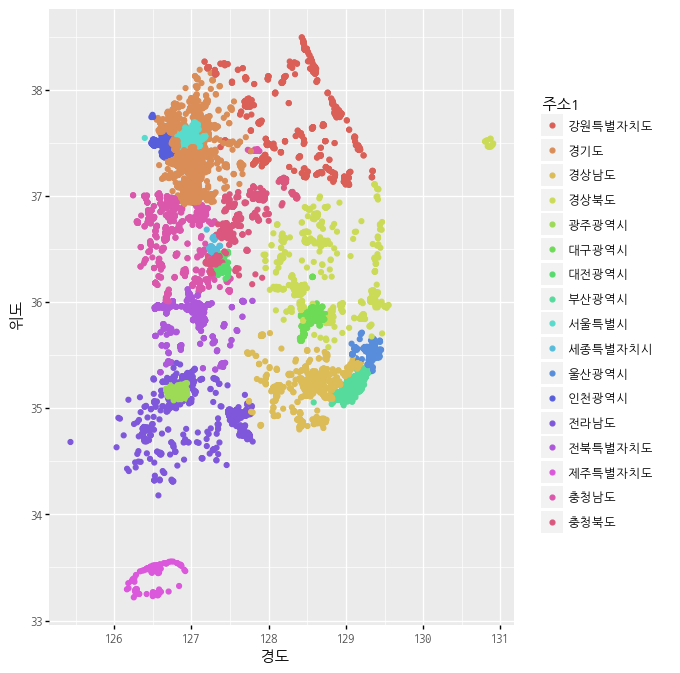

<ggplot: (154195711934)>

In [34]:
(
    ggplot(park_202405, aes(x='경도', y='위도', color='주소1'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6, 8))
)

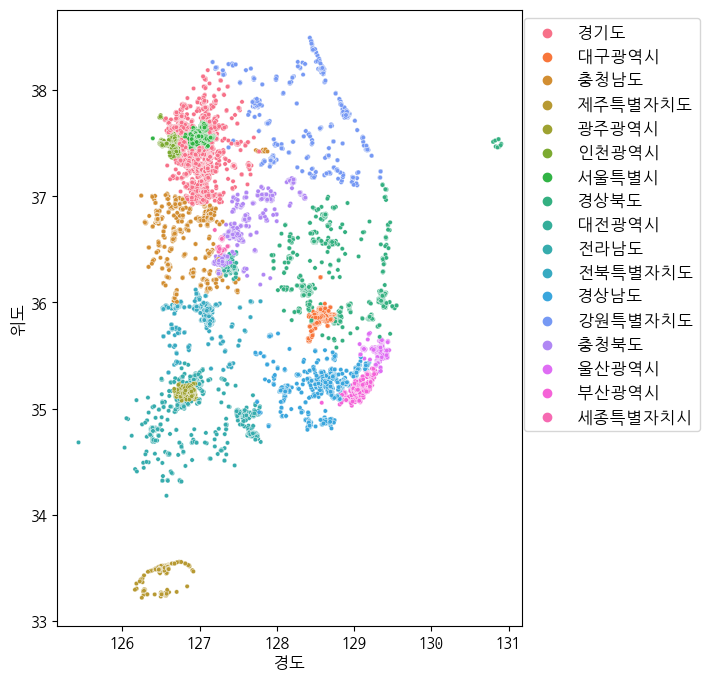

In [35]:
plt.figure(figsize=(6, 8))
sns.scatterplot(park_202405, x='경도', y='위도', s=10, hue='주소1')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
plt.show()

공원 구분별 분포현황 시각화

In [36]:
park_202405.공원구분.value_counts()

어린이공원       9583
근린공원        4245
소공원         3025
기타           622
문화공원         471
수변공원         370
체육공원         264
역사공원         197
묘지공원          44
기타공원          30
도시농업공원         8
주제공원           2
도시자연공원구역       2
가로공원           1
공공공지           1
Name: 공원구분, dtype: int64

In [37]:
# '공원구분' 열이 '기타공원'인 데이터를 '기타'로 수정한다.
park_202405.loc[park_202405.공원구분 == '기타공원', '공원구분'] = '기타'
# '공원구분' 열이 '도시자연공원구역'인 데이터를 '도시자연공원'로 수정한다.
park_202405.loc[park_202405.공원구분 == '도시자연공원구역', '공원구분'] = '도시자연공원'

In [38]:
park_202405.공원구분.value_counts()

어린이공원     9583
근린공원      4245
소공원       3025
기타         652
문화공원       471
수변공원       370
체육공원       264
역사공원       197
묘지공원        44
도시농업공원       8
주제공원         2
도시자연공원       2
가로공원         1
공공공지         1
Name: 공원구분, dtype: int64

In [39]:
# '공원면적' 열에 적당한 수식을 실행해서 '공원면적비율' 파생 변수를 추가한다.
# 시리즈에 저장된 데이터가 lambda 뒤의 변수로 1건씩 차례대로 전달되고 수식을 실행한 후 apply() 메소드에
# 의해서 지정된 시리즈에 일괄적으로 적용된다.
# 시리즈.apply(lambda 변수: 수식)
park_202405['공원면적비율'] = park_202405.공원면적.apply(lambda x: np.sqrt(x) * 0.01)
park_202405

관리번호         공원명  공원구분               소재지도로명주소  \
0      41830-00017    광탄2호 소공원   소공원    경기도 양평군 용문면 광탄리 711   
1      41830-00031    광탄3호 소공원   소공원    경기도 양평군 용문면 광탄리 762   
2      41830-00018      공흥 소공원   소공원  경기도 양평군 양평읍 공흥리 885-1   
3      41830-00019   한강아트로드 공원   소공원  경기도 양평군 강하면 운심리 43-25   
4      41830-00020      강하 소공원   소공원     경기도 양평군 강하면 운심길 58   
...            ...         ...   ...                    ...   
18860  28110-00116  영종하늘도시 33호  근린공원    인천광역시 중구 중산동 1959-2   
18861  28110-00117  영종하늘도시 34호  근린공원   인천광역시 중구 운남동 1745-10   
18862  28110-00118  영종하늘도시 35호  근린공원    인천광역시 중구 운남동 1681-9   
18863  28110-00119  영종하늘도시 36호  근린공원   인천광역시 중구 중산동 1926-19   
18864  28110-00120  영종하늘도시 37호  근린공원   인천광역시 중구 운남동 1722-84   

                     소재지지번주소         위도          경도     공원면적          전화번호  \
0        경기도 양평군 용문면 광탄리 711  37.509628  127.628406    856.0  031-770-2358   
1        경기도 양평군 용문면 광탄리 762  37.508443  127.627414    847.0  031-770-2358   
2      경기도 양평군 양평읍 공흥리 885-1  37.493844  127.509326   1276.0  031-770-2358   
3      경기도 양평군 강하면 운심리 43-25  37.496021  127.408216   3300.0  031-770-2358   
4       경기도 양평군 강하면 운심리 28-1  37.496164  127.412326    394.0  031-770-2358   
...                      ...        ...         ...      ...           ...   
18860    인천광역시 중구 중산동 1959-2  37.492194  126.575593   8652.0  032-760-7777   
18861   인천광역시 중구 운남동 1745-10  37.482082  126.540403  43514.0  032-760-7777   
18862    인천광역시 중구 운남동 1681-9  37.480161  126.509114  55128.0  032-760-7777   
18863   인천광역시 중구 중산동 1926-19  37.497137  126.575911  10172.0  032-760-7777   
18864   인천광역시 중구 운남동 1722-84  37.482703  126.516949  28384.0  032-760-7777   

          데이터기준일자   제공기관코드     제공기관명    주소1  주소2  주소3      주소4    공원면적비율  
0      2023-05-26  4170000   경기도 양평군    경기도  양평군  용문면      광탄리  0.292575  
1      2023-05-26  4170000   경기도 양평군    경기도  양평군  용문면      광탄리  0.291033  
2      2023-05-26  4170000   경기도 양평군    경기도  양평군  양평읍      공흥리  0.357211  
3      2023-05-26  4170000   경기도 양평군    경기도  양평군  강하면      운심리  0.574456  
4      2023-05-26  4170000   경기도 양평군    경기도  양평군  강하면      운심길  0.198494  
...           ...      ...       ...    ...  ...  ...      ...       ...  
18860  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  중산동   1959-2  0.930161  
18861  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동  1745-10  2.086001  
18862  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동   1681-9  2.347935  
18863  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  중산동  1926-19  1.008563  
18864  2023-05-16  3490000  인천광역시 중구  인천광역시   중구  운남동  1722-84  1.684755  

[18865 rows x 17 columns]

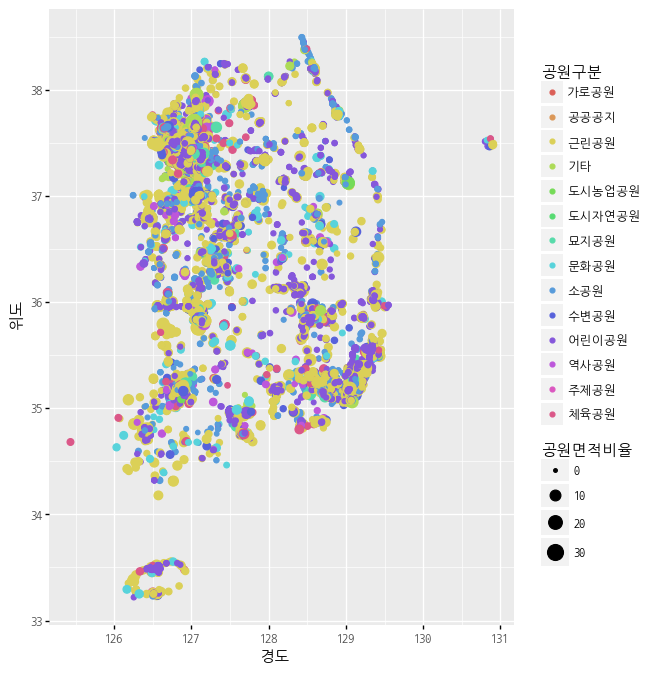

<ggplot: (-9223371882658700060)>

In [40]:
(
    ggplot(park_202405, aes(x='경도', y='위도', color='공원구분', size='공원면적비율'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6, 8))
)

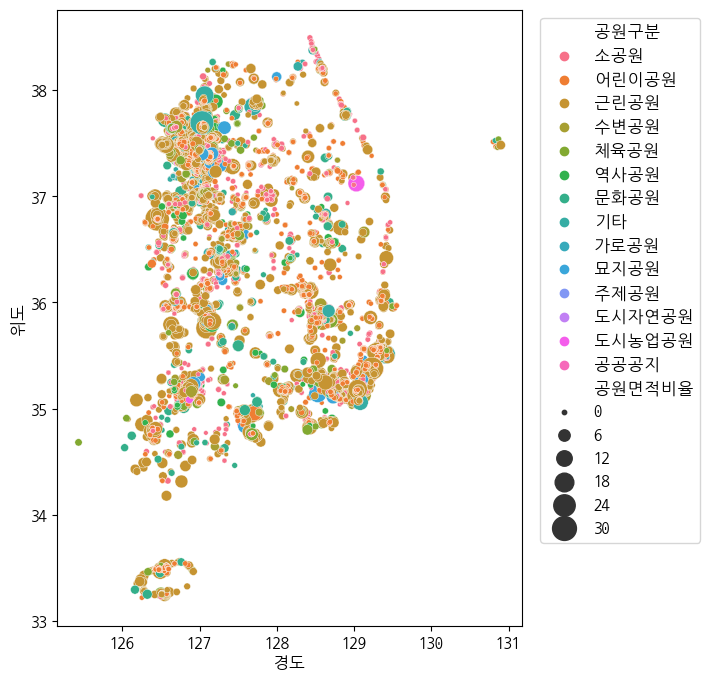

In [41]:
plt.figure(figsize=(6, 8))
sns.scatterplot(park_202405, x='경도', y='위도', s=10, hue='공원구분', size='공원면적비율', sizes=(10, 300))
plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
plt.show()

어린이 공원을 제외한 공원 구분별 분포현황 시각화

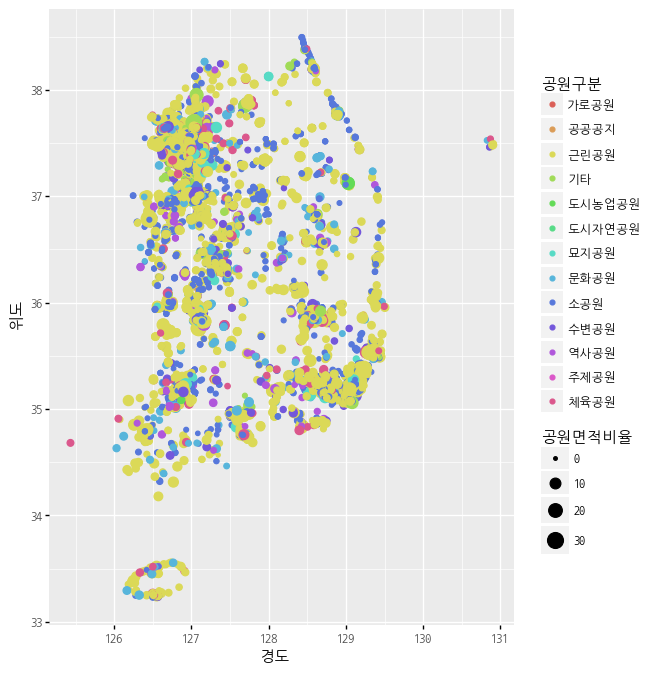

<ggplot: (-9223371882658261553)>

In [42]:
(
    ggplot(park_202405[park_202405.공원구분 != '어린이공원'], aes(x='경도', y='위도', color='공원구분', size='공원면적비율'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6, 8))
)

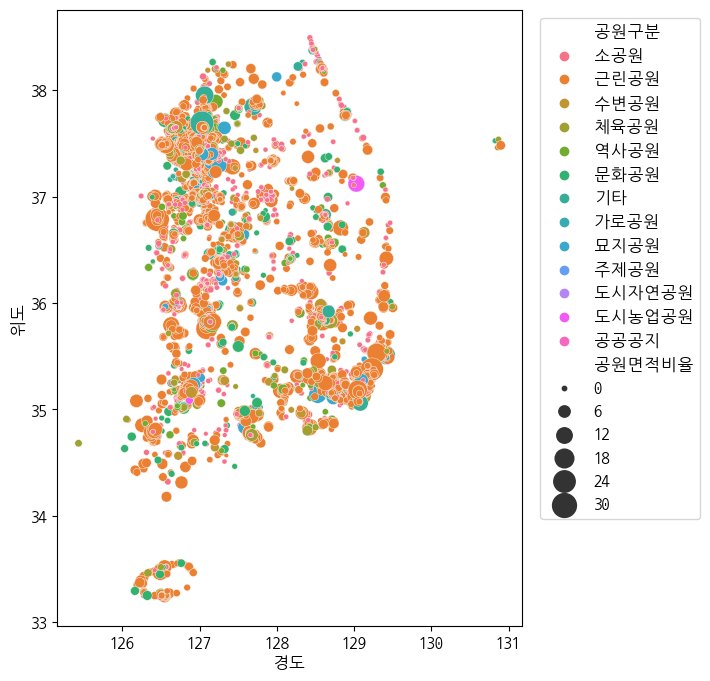

In [43]:
plt.figure(figsize=(6, 8))
sns.scatterplot(park_202405[park_202405.공원구분 != '어린이공원'], x='경도', y='위도', s=10, 
                hue='공원구분', size='공원면적비율', sizes=(10, 300))
plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
plt.show()

시도별 공원 시각화

In [44]:
# value_counts() 메소드는 지정된 시리즈별 개수 또는 전체 개수에 대한 비율을 계산한다.
# normalize 옵션의 기본값은 False로 개수를 계산하고 True로 지정하면 전체 개수에 대한 비율을 계산한다.
# ascending 옵션의 기본값은 False로 계산 결과를 내림차순으로 정렬하고 True로 지정하면 오름차순으로 정렬한다.
# dropna 옵션의 기본값은 True로 NaN을 무시하고 계산하고 False로 지정하면 NaN을 포함시켜 계산한다.
park_count = pd.DataFrame(park_202405.주소1.value_counts()) # normalize=False, ascending=False, dropna=True
park_count.head()

주소1
경기도      4503
서울특별시    1951
충청남도     1716
전북특별자치도  1333
강원특별자치도  1288

In [45]:
park_per = pd.DataFrame(park_202405.주소1.value_counts(normalize=True))
park_per.head()

주소1
경기도      0.238696
서울특별시    0.103419
충청남도     0.090962
전북특별자치도  0.070660
강원특별자치도  0.068275

In [46]:
# 시도별 공원 개수 데이터와 전체 개수에 대한 비율 데이터를 병합한다.
# concat() 메소드 실행 결과에 reset_index() 메소드를 실행하면 인덱스를 데이터로 사용하고 새 인덱스가
# 부여된다.
# park_sido = pd.concat([park_count, park_per], axis=1).reset_index()
# merge 메소드로 두 개의 데이터프레임을 병합할 때 왼쪽, 오른쪽 데이터프레임에 공통된 데이터가 있는
# 열을 left_on, right_on 속성으로 지정한다.
# 공동된 데이터가 있는 열이 없고 데이터프레임 병합 기준을 인덱스로 지정하려면 left_index, right_index
# 옵션을 각각 True로 지정한다.
# merge 메소드도 concat() 메소드와 같이 실행 결과에 reset_index() 메소드를 실행하면 인덱스를 데이터로 
# 사용하고 새 인덱스가 부여된다.
park_sido = park_count.merge(park_per, left_index=True, right_index=True).reset_index()
park_sido.columns = ['시도', '개수', '비율']
park_sido.head()

시도    개수        비율
0      경기도  4503  0.238696
1    서울특별시  1951  0.103419
2     충청남도  1716  0.090962
3  전북특별자치도  1333  0.070660
4  강원특별자치도  1288  0.068275

In [47]:
park_count = pd.DataFrame(park_202405.주소1.value_counts()).reset_index()
park_count.head()

index   주소1
0      경기도  4503
1    서울특별시  1951
2     충청남도  1716
3  전북특별자치도  1333
4  강원특별자치도  1288

In [48]:
park_per = pd.DataFrame(park_202405.주소1.value_counts(normalize=True)).reset_index()
park_per.head()

index       주소1
0      경기도  0.238696
1    서울특별시  0.103419
2     충청남도  0.090962
3  전북특별자치도  0.070660
4  강원특별자치도  0.068275

In [49]:
park_sido = park_count.merge(park_per, left_on='index', right_on='index')
park_sido.columns = ['시도', '개수', '비율']
park_sido.head()

시도    개수        비율
0      경기도  4503  0.238696
1    서울특별시  1951  0.103419
2     충청남도  1716  0.090962
3  전북특별자치도  1333  0.070660
4  강원특별자치도  1288  0.068275

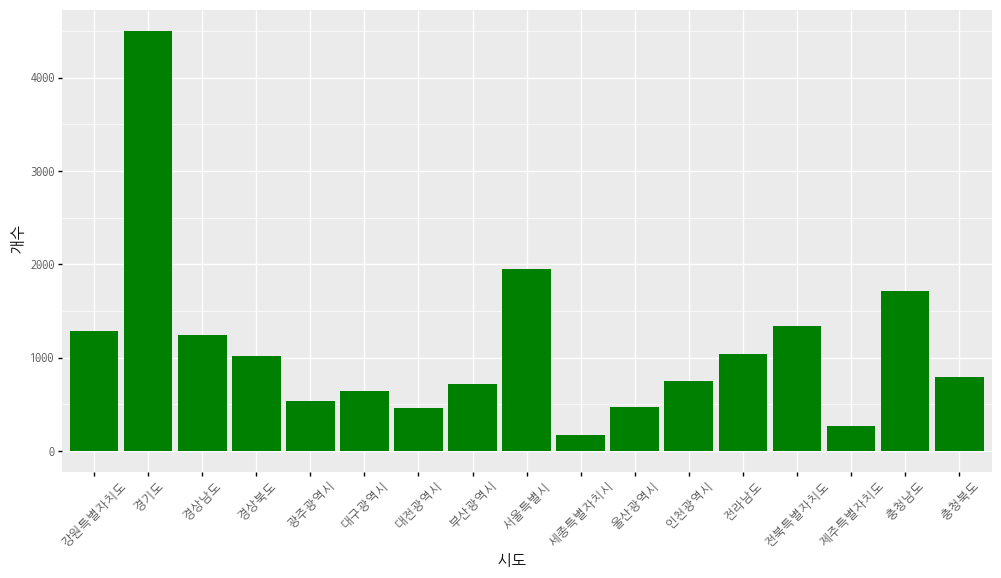

<ggplot: (154199004487)>

In [50]:
(
    ggplot(park_sido, aes(x='시도', y='개수'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(12, 6), 
                axis_text_x=element_text(rotation=45))
)

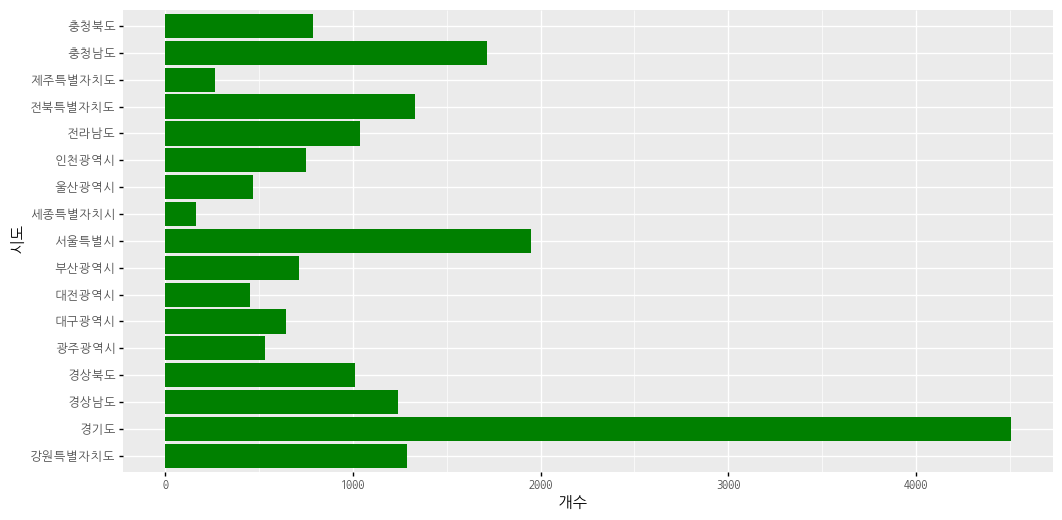

<ggplot: (154199541487)>

In [51]:
(
    ggplot(park_sido, aes(x='시도', y='개수'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + coord_flip() # x축과 y축을 뒤집어서 가로 막대 그래프를 만든다.
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(12, 6))
)

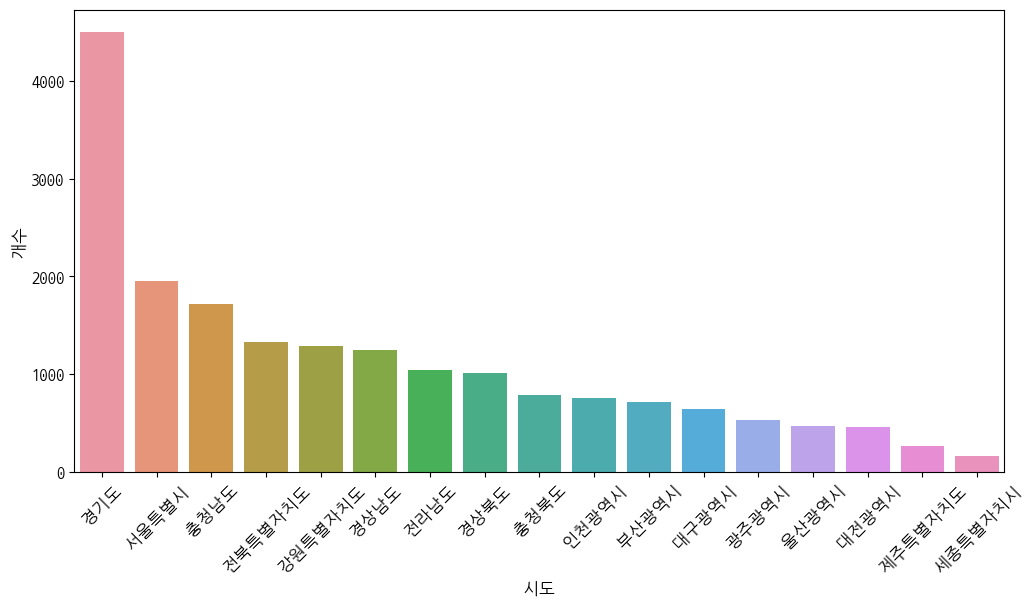

In [52]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(park_sido, x='시도', y='개수')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

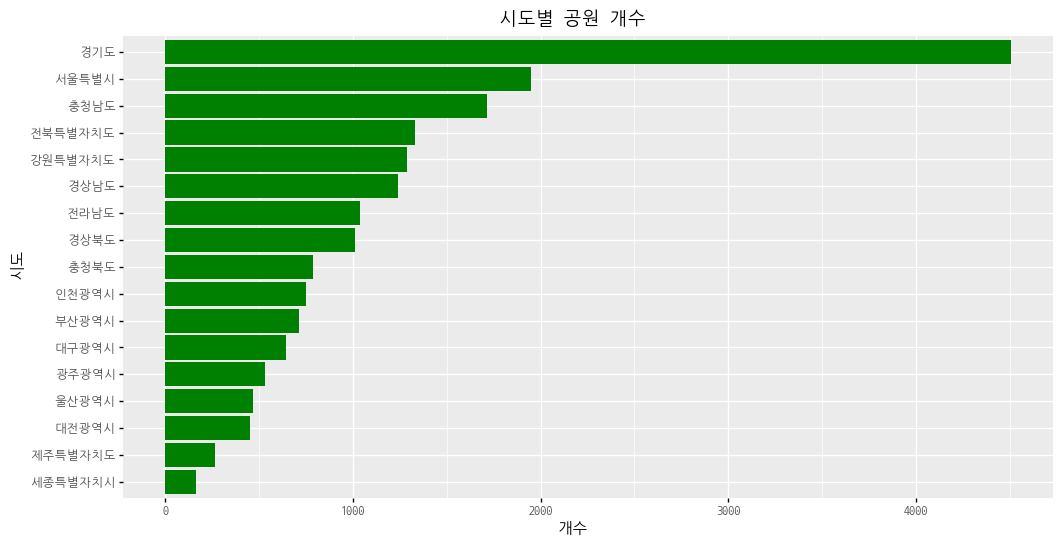

<ggplot: (154199541312)>

In [53]:
# https://plotnine.org/tutorials/miscellaneous-order-plot-series.html#ordered-horizontal-bars
park_list = park_202405["주소1"].value_counts().index.tolist()[::-1]
parkList = pd.Categorical(park_202405["주소1"], categories=park_list)
data = park_202405.assign(공원목록=parkList)
(
    ggplot(data)
    + aes(x="공원목록")
    + geom_bar(size=20, fill='green')
    + coord_flip()
    + labs(y="개수", x="시도", title="시도별 공원 개수")
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(12, 6))
)

공원 구분별 공원 시각화

In [56]:
park_type = pd.DataFrame(park_202405.공원구분.value_counts()).reset_index()
park_type.columns = ['공원구분', '개수']
park_type.head()

공원구분    개수
0  어린이공원  9583
1   근린공원  4245
2    소공원  3025
3     기타   652
4   문화공원   471

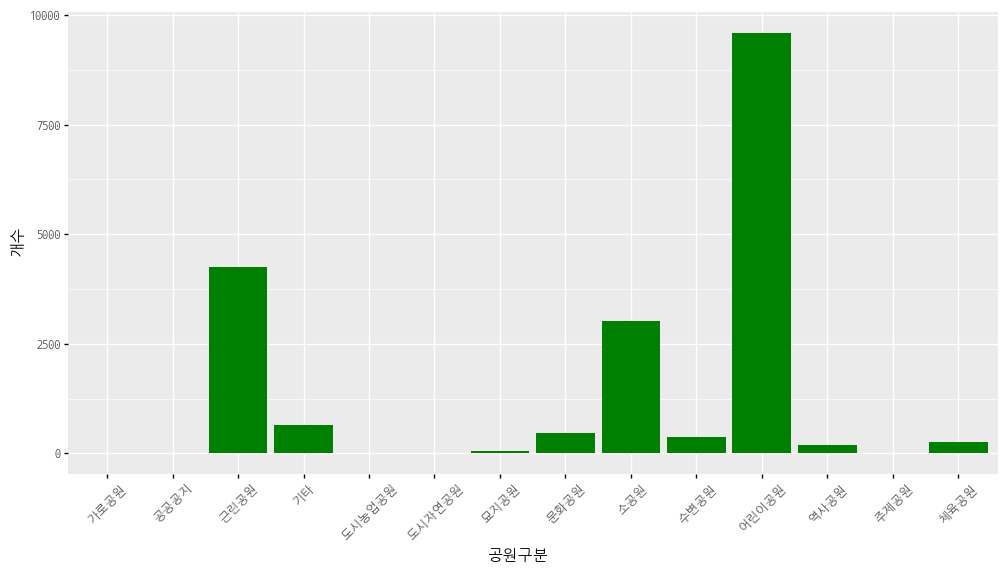

<ggplot: (-9223371882655446433)>

In [58]:
(
    ggplot(park_type, aes(x='공원구분', y='개수'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(12, 6), 
                axis_text_x=element_text(rotation=45))
)

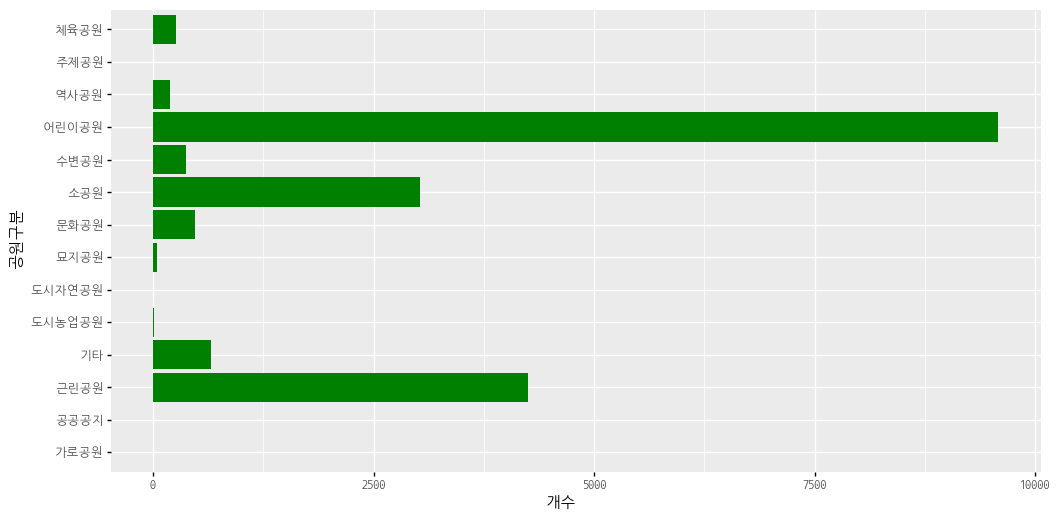

<ggplot: (-9223371882654511139)>

In [60]:
(
    ggplot(park_type, aes(x='공원구분', y='개수'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + coord_flip()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(12, 6))
)

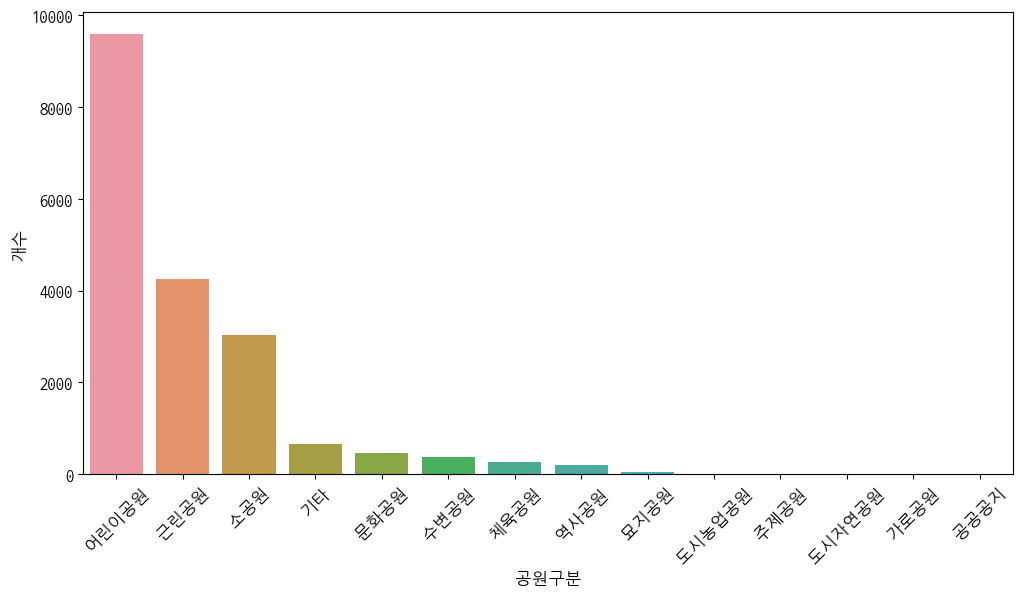

In [62]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(park_type, x='공원구분', y='개수')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

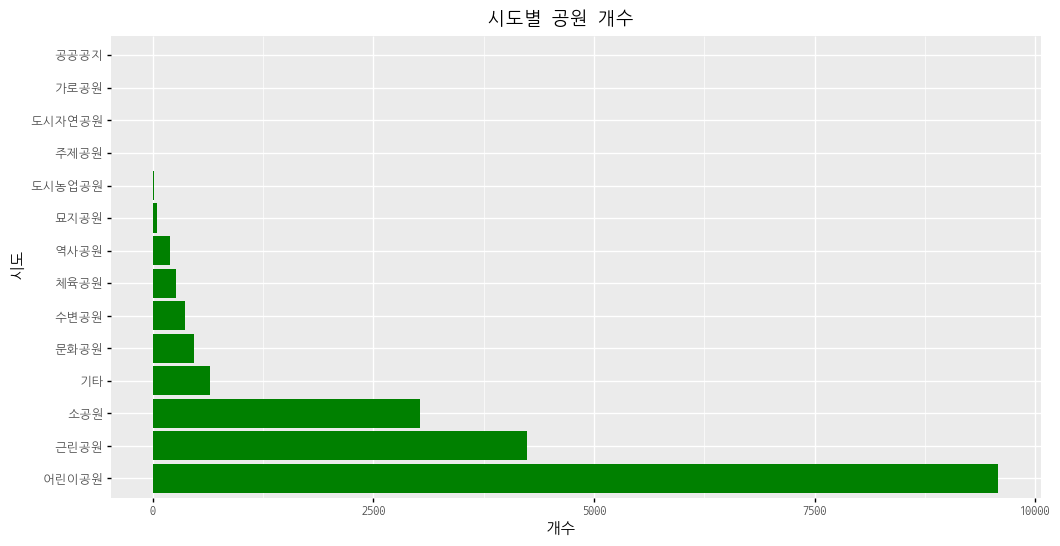

<ggplot: (-9223371882652665919)>

In [65]:
park_list = park_202405["공원구분"].value_counts().index.tolist()
parkList = pd.Categorical(park_202405["공원구분"], categories=park_list)
data = park_202405.assign(공원목록=parkList)
(
    ggplot(data)
    + aes(x="공원목록")
    + geom_bar(size=20, fill='green')
    + coord_flip()
    + labs(y="개수", x="시도", title="시도별 공원 개수")
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(12, 6))
)

경기도 공원 분포 시각화

In [66]:
gyeonggi = park_202405[park_202405.주소1 == '경기도']
gyeonggi

관리번호        공원명   공원구분               소재지도로명주소  \
0      41830-00017   광탄2호 소공원    소공원    경기도 양평군 용문면 광탄리 711   
1      41830-00031   광탄3호 소공원    소공원    경기도 양평군 용문면 광탄리 762   
2      41830-00018     공흥 소공원    소공원  경기도 양평군 양평읍 공흥리 885-1   
3      41830-00019  한강아트로드 공원    소공원  경기도 양평군 강하면 운심리 43-25   
4      41830-00020     강하 소공원    소공원     경기도 양평군 강하면 운심길 58   
...            ...        ...    ...                    ...   
18842  41190-00154      전원2단지  어린이공원     경기도 부천시 오정구 작동 344   
18843  41190-00155      전원3단지  어린이공원   경기도 부천시 오정구 작동 371-4   
18844  41190-00156      전원4단지  어린이공원     경기도 부천시 오정구 작동 382   
18845  41190-00157         점말  어린이공원    경기도 부천시 오정구 여월동 309   
18846  41190-00158         정명  어린이공원   경기도 부천시 소사구 심곡본동 818   

                     소재지지번주소         위도          경도    공원면적          전화번호  \
0        경기도 양평군 용문면 광탄리 711  37.509628  127.628406   856.0  031-770-2358   
1        경기도 양평군 용문면 광탄리 762  37.508443  127.627414   847.0  031-770-2358   
2      경기도 양평군 양평읍 공흥리 885-1  37.493844  127.509326  1276.0  031-770-2358   
3      경기도 양평군 강하면 운심리 43-25  37.496021  127.408216  3300.0  031-770-2358   
4       경기도 양평군 강하면 운심리 28-1  37.496164  127.412326   394.0  031-770-2358   
...                      ...        ...         ...     ...           ...   
18842     경기도 부천시 오정구 작동 344  37.510749  126.809895  3660.9  032-625-4855   
18843   경기도 부천시 오정구 작동 371-4  37.507671  126.812420  1531.3  032-625-4855   
18844     경기도 부천시 오정구 작동 382  37.507496  126.811025  2455.7  032-625-4855   
18845    경기도 부천시 오정구 여월동 309  37.511053  126.799506  4168.1  032-625-4855   
18846   경기도 부천시 소사구 심곡본동 818  37.476115  126.774793  1520.1  032-625-4854   

          데이터기준일자   제공기관코드    제공기관명  주소1  주소2  주소3   주소4    공원면적비율  
0      2023-05-26  4170000  경기도 양평군  경기도  양평군  용문면   광탄리  0.292575  
1      2023-05-26  4170000  경기도 양평군  경기도  양평군  용문면   광탄리  0.291033  
2      2023-05-26  4170000  경기도 양평군  경기도  양평군  양평읍   공흥리  0.357211  
3      2023-05-26  4170000  경기도 양평군  경기도  양평군  강하면   운심리  0.574456  
4      2023-05-26  4170000  경기도 양평군  경기도  양평군  강하면   운심길  0.198494  
...           ...      ...      ...  ...  ...  ...   ...       ...  
18842  2024-01-23  3860000  경기도 부천시  경기도  부천시  오정구    작동  0.605054  
18843  2024-01-23  3860000  경기도 부천시  경기도  부천시  오정구    작동  0.391318  
18844  2024-01-23  3860000  경기도 부천시  경기도  부천시  오정구    작동  0.495550  
18845  2024-01-23  3860000  경기도 부천시  경기도  부천시  오정구   여월동  0.645608  
18846  2024-01-23  3860000  경기도 부천시  경기도  부천시  소사구  심곡본동  0.389885  

[4503 rows x 17 columns]

In [69]:
gyeonggi_map = folium.Map(location=[gyeonggi.위도.mean(), gyeonggi.경도.mean()], zoom_start=10)
for index, data in gyeonggi.iterrows():
    popup = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소), max_width=300)
    folium.Marker(location=[data.위도, data.경도], popup=popup).add_to(gyeonggi_map)
gyeonggi_map

수원시 공원 분포 시각화

In [70]:
suwon = park_202405[park_202405.주소2 == '수원시']
suwon

관리번호 공원명   공원구분                   소재지도로명주소  \
9222  41117-00014  열림   근린공원       경기도 수원시 영통구 웰빙타운로 73   
9223  41117-00015  성죽   근린공원       경기도 수원시 영통구 이의동 1213   
9224  41117-00016  솔내   근린공원       경기도 수원시 영통구 이의동 1215   
9225  41117-00017  연암   근린공원       경기도 수원시 영통구 이의동 1288   
9226  41117-00018  망포   근린공원      경기도 수원시 영통구 망포동 358-5   
...           ...  ..    ...                        ...   
9660  41111-00041  백설  어린이공원  경기도 수원시 장안구 정자천로 133번길 26   
9661  41111-00042  꽃뫼  어린이공원      경기도 수원시 장안구 정자동 883-3   
9662  41111-00043  명인  어린이공원  경기도 수원시 장안구 정자천로 188번길 28   
9663  41111-00044  두견  어린이공원      경기도 수원시 장안구 정자동 887-2   
9664  41111-00045  동신  어린이공원      경기도 수원시 장안구 정자동 880-1   

                    소재지지번주소         위도          경도      공원면적          전화번호  \
9222    경기도 수원시 영통구 이의동1183  37.305557  127.043153  152646.2  031-228-8331   
9223   경기도 수원시 영통구 이의동 1213  37.309474  127.048074   73873.5  031-228-8331   
9224   경기도 수원시 영통구 이의동 1215  37.308184  127.051022   24489.3  031-228-8331   
9225   경기도 수원시 영통구 이의동 1288  37.294502  127.036434  128896.7  031-228-8331   
9226  경기도 수원시 영통구 망포동 358-5  37.242464  127.057720   15990.6  031-228-8331   
...                     ...        ...         ...       ...           ...   
9660  경기도 수원시 장안구 정자동 879-2  37.295134  126.991115    2999.9  031-228-5995   
9661  경기도 수원시 장안구 정자동 883-3  37.292879  126.992097    3100.1  031-228-5995   
9662  경기도 수원시 장안구 정자동 884-5  37.294971  126.995584    2000.1  031-228-5995   
9663  경기도 수원시 장안구 정자동 887-2  37.291502  126.997465    2000.0  031-228-5995   
9664  경기도 수원시 장안구 정자동 880-1  37.294832  126.990111    1600.2  031-228-5995   

         데이터기준일자   제공기관코드    제공기관명  주소1  주소2  주소3    주소4    공원면적비율  
9222  2023-06-20  3740000  경기도 수원시  경기도  수원시  영통구  웰빙타운로  3.906996  
9223  2023-06-20  3740000  경기도 수원시  경기도  수원시  영통구    이의동  2.717968  
9224  2023-06-20  3740000  경기도 수원시  경기도  수원시  영통구    이의동  1.564906  
9225  2023-06-20  3740000  경기도 수원시  경기도  수원시  영통구    이의동  3.590219  
9226  2023-06-20  3740000  경기도 수원시  경기도  수원시  영통구    망포동  1.264539  
...          ...      ...      ...  ...  ...  ...    ...       ...  
9660  2023-06-20  3740000  경기도 수원시  경기도  수원시  장안구   정자천로  0.547713  
9661  2023-06-20  3740000  경기도 수원시  경기도  수원시  장안구    정자동  0.556785  
9662  2023-06-20  3740000  경기도 수원시  경기도  수원시  장안구   정자천로  0.447225  
9663  2023-06-20  3740000  경기도 수원시  경기도  수원시  장안구    정자동  0.447214  
9664  2023-06-20  3740000  경기도 수원시  경기도  수원시  장안구    정자동  0.400025  

[335 rows x 17 columns]

In [74]:
suwon_map = folium.Map(location=[suwon.위도.mean(), suwon.경도.mean()], zoom_start=13)
for index, data in suwon.iterrows():
    popup = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소), max_width=300)
    folium.Marker(location=[data.위도, data.경도], popup=popup).add_to(suwon_map)
suwon_map

In [75]:
suwon_map = folium.Map(location=[suwon.위도.mean(), suwon.경도.mean()], zoom_start=13)
for index, data in suwon.iterrows():
    popup = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소), max_width=300)
    folium.CircleMarker(location=[data.위도, data.경도], popup=popup,
                       radius=data.공원면적비율, color='red', fill_color='white').add_to(suwon_map)
suwon_map

경기도 일부 공원만 보기

In [83]:
park_type = r'.*([역사|체육|수변|문화|묘지]공원).*'
gyeonggi_sample = gyeonggi[gyeonggi.공원구분.str.match(park_type)]
gyeonggi_sample

관리번호                      공원명  공원구분                    소재지도로명주소  \
165    41220-00096  2호 물빛2 수변공원(소사벌택지 이곡수변)  수변공원           경기도 평택시 비전동 1016공   
166    41220-00097        3호 소리 수변공원(소사벌택지)  수변공원          경기도 평택시 죽백동 737-2공   
167    41220-00098        4호 소리 수변공원(소사벌택지)  수변공원           경기도 평택시 비전동 1032공   
168    41220-00099  5호 물빛3 수변공원(소사벌택지 이곡수변)  수변공원           경기도 평택시 비전동 1069공   
169    41220-00100  6호 물빛4 수변공원(소사벌택지 이곡수변)  수변공원  경기도 평택시 비전동 1065 1093 1099   
...            ...                      ...   ...                         ...   
18115  41220-00308           통복2 수변공원(수촌지구)  수변공원        경기도 평택시 수촌길 50 (칠원동)   
18552  41290-00012                 죽바위2역사공원  역사공원              경기도 과천시 추사로 78   
18553  41290-00013                   관문체육공원  체육공원             경기도 과천시 중앙로 294   
18554  41290-00014                   문원체육공원  체육공원              경기도 과천시 문원로 56   
18555  41290-00015                관문어린이문화공원  문화공원             경기도 과천시 중앙로 294   

                          소재지지번주소         위도          경도      공원면적  \
165             경기도 평택시 비전동 1016공  37.003573  127.103911   11228.0   
166            경기도 평택시 죽백동 737-2공  37.007098  127.111214   11408.5   
167             경기도 평택시 비전동 1032공  37.004339  127.107357   19823.0   
168             경기도 평택시 비전동 1069공  37.002460  127.107881   19099.0   
169    경기도 평택시 비전동 1065 1093 1099  37.001798  127.111412   24015.0   
...                           ...        ...         ...       ...   
18115             경기도 평택시 칠원동 286  37.020802  127.113503   13256.0   
18552           경기도 과천시 주암동 184-2  37.453005  127.028747    4299.0   
18553               경기도 과천시 관문동 3  37.441365  126.996348  176471.0   
18554              경기도 과천시 문원동 20  37.427921  127.003661   36676.0   
18555               경기도 과천시 관문동 3  37.441365  126.996348    3665.0   

                전화번호     데이터기준일자   제공기관코드    제공기관명  주소1  주소2  주소3     주소4  \
165    031-8024-4248  2024-03-08  3910000  경기도 평택시  경기도  평택시  비전동   1016공   
166    031-8024-4248  2024-03-08  3910000  경기도 평택시  경기도  평택시  죽백동  737-2공   
167    031-8024-4248  2024-03-08  3910000  경기도 평택시  경기도  평택시  비전동   1032공   
168    031-8024-4248  2024-03-08  3910000  경기도 평택시  경기도  평택시  비전동   1069공   
169    031-8024-4248  2024-03-08  3910000  경기도 평택시  경기도  평택시  비전동    1065   
...              ...         ...      ...      ...  ...  ...  ...     ...   
18115  031-8024-4248  2024-03-08  3910000  경기도 평택시  경기도  평택시  수촌길      50   
18552   02-3677-2272  2023-08-01  3970000  경기도 과천시  경기도  과천시  추사로      78   
18553    02-500-1410  2023-08-01  3970000  경기도 과천시  경기도  과천시  중앙로     294   
18554    02-500-1410  2023-08-01  3970000  경기도 과천시  경기도  과천시  문원로      56   
18555    02-500-1410  2023-08-01  3970000  경기도 과천시  경기도  과천시  중앙로     294   

         공원면적비율  
165    1.059623  
166    1.068106  
167    1.407942  
168    1.381991  
169    1.549677  
...         ...  
18115  1.151347  
18552  0.655668  
18553  4.200845  
18554  1.915098  
18555  0.605392  

[404 rows x 17 columns]

In [84]:
set(gyeonggi_sample.공원구분)

{'묘지공원', '문화공원', '수변공원', '역사공원', '체육공원'}

In [85]:
gyeonggi_sample_map = folium.Map(location=[suwon.위도.mean(), suwon.경도.mean()], zoom_start=10)
for index, data in gyeonggi_sample.iterrows():
    popup = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소), max_width=300)
    folium.Marker(location=[data.위도, data.경도], popup=popup).add_to(gyeonggi_sample_map)
gyeonggi_sample_map

In [88]:
gyeonggi_sample_map = folium.Map(location=[suwon.위도.mean(), suwon.경도.mean()], zoom_start=10)
for index, data in gyeonggi_sample.iterrows():
    popup = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소), max_width=300)
    folium.CircleMarker(location=[data.위도, data.경도], popup=popup,
                       radius=data.공원면적비율, color='red', fill_color='white').add_to(gyeonggi_sample_map)
gyeonggi_sample_map